in this problem  statemment  we are given eith the featrues of gene vriation and text of the cancr data and to predict the which type of cancer it is.
so it is clearly stated that we are dealing with the cancer.

* **there are features fot this problem statement as gene,variation and text as the features **
* we can bulid machine learning model on each of these features 
* the important thing in this problem statement is this problem is a multi calss classificartion problem
* class labels varies from 1 to 9 we can predict which class the type of cancer belongs to

* ** assignments**
* based on this problem statement 4 assignments are to be done


---



1.   instead of applying tfidf vectorizer use count vectorizer
2.   instaed of taking all the words take top 1000 words based on their tfidf values
3. apply logistic regression with countvectorizer with both unigrams and bigrams
4.  by using any feature engineering techinique reduice the log loss less than 1.0



since it is a multiclass classification problem the metrics that we gonna consider is
* multiclass logloss
* confusion matrix

#### we have the multiclass label that is the reason we gonna consider the multi class log loss
#### log loss does not have the maximum value or the minimum value based on the loss of the random model we will consider the threshold logloss and try to improve the log loss by feature engineering and the hyperparameter tuning of the models.
#### in this case study we have used several feature extraction and feature engineering techniques.
### our task1 to use the count vectorizer instead of using the tfidf vectorizer

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1ClZQUuBTtIatBFZpPz7rXimqukBUDPWc' # The shareable link

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1ClZQUuBTtIatBFZpPz7rXimqukBUDPWc


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('personalcancerassignmentdata.csv')  


In [0]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from nltk.corpus import stopwords
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import hstack
from sklearn.metrics.classification import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
data=pd.read_csv('personalcancerassignmentdata.csv')

In [0]:
data.rename(columns={'TEXT':'Text'}, inplace=True)

In [0]:
data.head(5)

,Unnamed: 0,ID,Gene,Variation,Class,Text,genevariation
0,0,0,FAM58A,Truncating_Mutations,1,cyclin dependent kinases cdks regulate variety...,FAM58A Truncating_Mutations
1,1,1,CBL,W802*,2,abstract background non small cell lung cancer...,CBL W802*
2,2,2,CBL,Q249E,2,abstract background non small cell lung cancer...,CBL Q249E
3,3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...,CBL N454D
4,4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...,CBL L399V


In [0]:
data=data[1:]

In [0]:
datanew=pd.read_csv('personalcancerassignmentdata.csv')

In [0]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [0]:
import re
stop=set(stopwords.words('english'))
def preprocessing(text,index,column):
    if type(text) is not int:
        string=""
        text=re.sub('[^a-zA-Z0-9]',' ',text)
        text=re.sub('\s+',' ',text)
        text=text.lower()
        for word in text.split():
            if not word in stop:
                string=string+word+" "
        data[column][index]=string
        

In [0]:
import time
starttime=time.clock()
for index,row in data.iterrows():
    if type(row['Text']) is str:
        preprocessing(row['Text'],index,'Text')
print(time.clock()-starttime)

439.732266


In [0]:
data.head(5)

,Unnamed: 0,ID,Gene,Variation,Class,Text,genevariation
1,1,1,CBL,W802*,2,abstract background non small cell lung cancer...,CBL W802*
2,2,2,CBL,Q249E,2,abstract background non small cell lung cancer...,CBL Q249E
3,3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...,CBL N454D
4,4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...,CBL L399V
5,5,5,CBL,V391I,4,oncogenic mutations monomeric casitas b lineag...,CBL V391I


In [0]:
datanew=pd.DataFrame()
datanew['Text']=data['Text']
datanew['Variation']=data['Variation']
datanew['Gene']=data['Gene']
datanew['Class']=data['Class']
datanew['ID']=data['ID']

In [0]:
print(datanew.shape)
datanew=datanew.dropna()
print(datanew.shape)

(3320, 5)
(3320, 5)


In [0]:
ylabel=datanew['Class'].values

###  dropping off thenull values costructing the new data set after preprocessing
### preprocessing involves the removal of unnecessary charecters
### filling or removal of null vlaues

In [0]:
datanew['Gene']=datanew['Gene'].str.replace('\s+',' ')
datanew['Variation']=datanew['Variation'].str.replace('\s+',' ')


* split the data into train data
* cross vlaidation data
* test data

In [0]:
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(datanew, ylabel, stratify=ylabel, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [0]:
trainclassdistribution=train_df['Class'].value_counts().sortlevel()
testclassdistribution=test_df['Class'].value_counts().sortlevel()
cvclassdistribution=cv_df['Class'].value_counts().sortlevel()
         

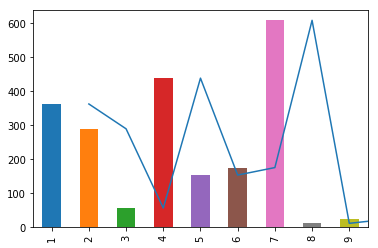

In [0]:
fig,ax=plt.subplots()
ax.plot(trainclassdistribution)
trainclassdistribution.plot(kind='bar')

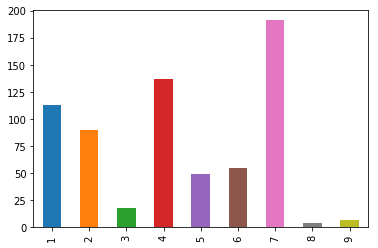

In [0]:
testclassdistribution.plot(kind='bar')

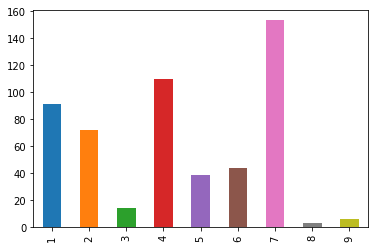

In [0]:
cvclassdistribution.plot(kind='bar')

In [0]:
def plotconfusionmatrix(testy,predictedy):
    labels=[1,2,3,4,5,6,7,8,9]
    print('confusionmatris')
    C=confusion_matrix(testy,predictedy)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [0]:
cvdatalength=cv_df.shape[0]
cvpredictedy=np.zeros((cvdatalength,9))
for i in range(cvdatalength):
    randomprobabilities=np.random.rand(1,9)
    cvpredictedy[i]=((randomprobabilities/sum(sum(randomprobabilities)))[0])
print('log loss of random model',log_loss(y_cv,cvpredictedy))

log loss of random model 2.5075410751178517


confusionmatris
-------------------- Confusion matrix --------------------


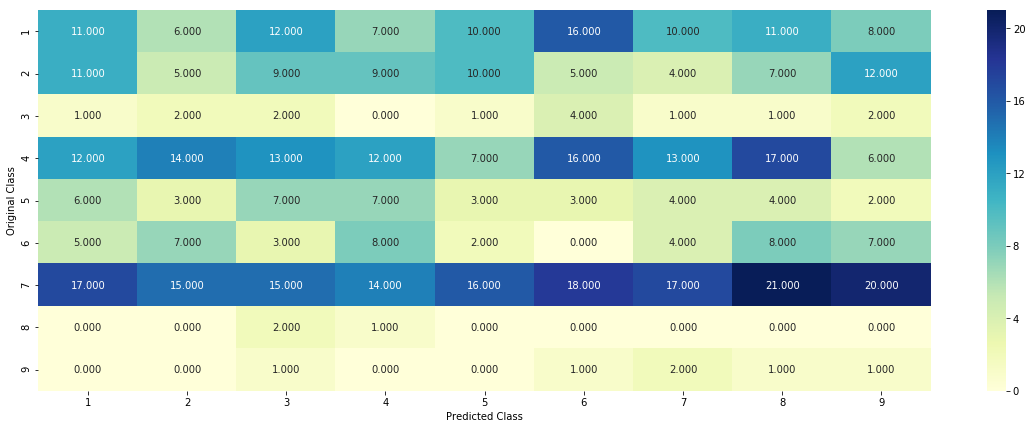

-------------------- Precision matrix (Columm Sum=1) --------------------


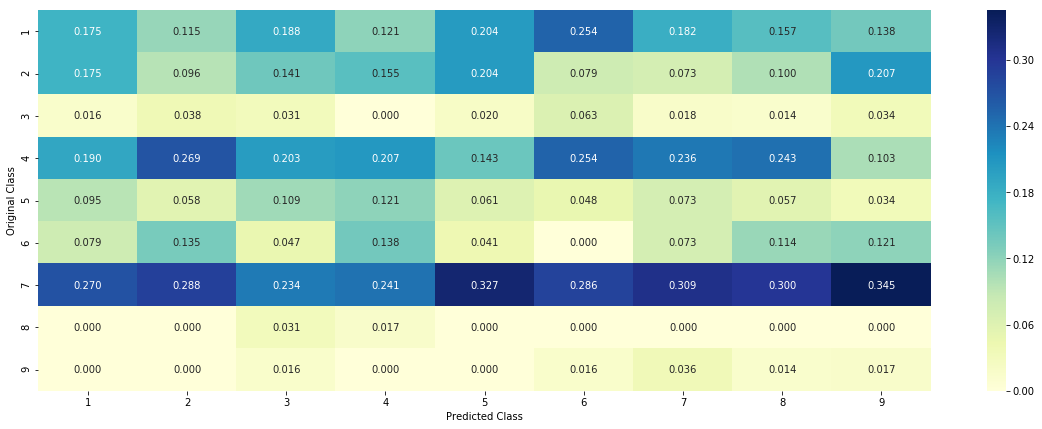

-------------------- Recall matrix (Row sum=1) --------------------


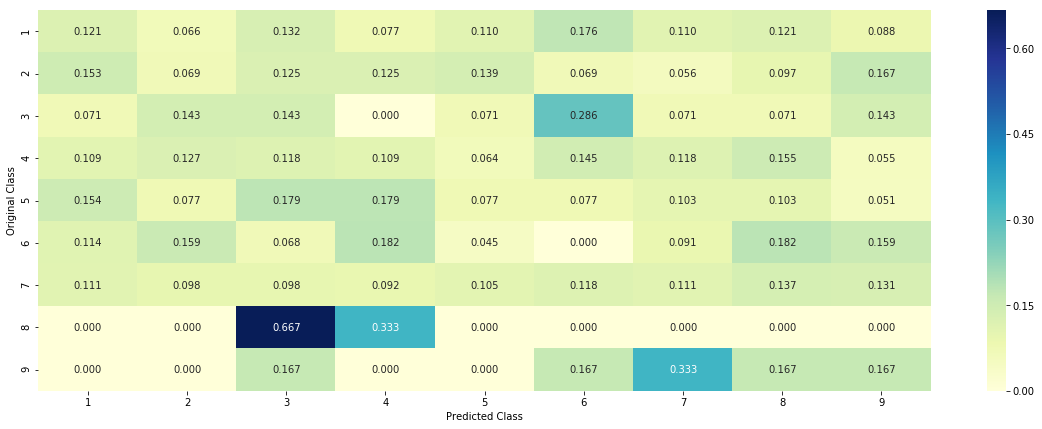

In [0]:
cvpredicted_y=np.argmax(cvpredictedy,axis=1)
plotconfusionmatrix(y_cv,cvpredicted_y+1)

In [0]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['train_df', 'test_df', 'cv_df']
# algorithm
# ----------
# Consider all unique values and the number of occurances of given feature in train data dataframe
# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):
    # value_count: it contains a dict like
    # print(train_df['Gene'].value_counts())
    # output:
    #        {BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    #         ...}
    # print(train_df['Variation'].value_counts())
    # output:
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = train_df[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

In [0]:
def genevariationfeature(alpha,feature,dataframe):
    genevariationdictionary1=getgenevariationfeaturedictionary(alpha,feature,dataframe)
    valuecount=dataframe[feature].value_counts()
    genevariationfeatures=[]
    for index,row in data.iterrows():
        if row[feature] in dict(valuecount).keys():
            genevariationfeatures.append(genevariationdictionary1[row[feature]])
        else:
            genevariationfeature.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
    return genevariationfeature

In [0]:
uniquegenes=train_df['Gene'].value_counts()
print('number of unique gene features',uniquegenes.shape[0])
print(type(uniquegenes))


number of unique gene features 238
<class 'pandas.core.series.Series'>


In [0]:
s=uniquegenes.values
print(s.shape)

(238,)


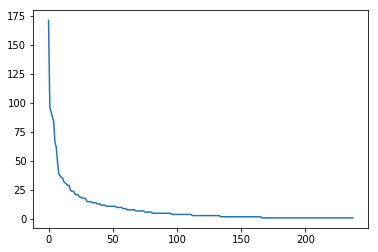

In [0]:
plt.plot(s)

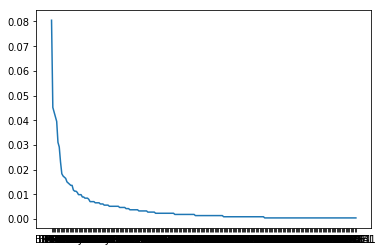

In [0]:
%matplotlib inline
h=sum(uniquegenes.values);
p=uniquegenes/h;
plt.plot(p)

In [0]:
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df))
# test gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df))
# cross validation gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", cv_df))

In [0]:
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df))
# test gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df))
# cross validation gene feature
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [0]:

def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['Text'].split():
            dictionary[word] +=1
    return dictionary

In [0]:
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['Text'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['Text'].split()))
            row_index += 1
    return text_feature_responseCoding

In [0]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = TfidfVectorizer(min_df=3,max_features=1000)
train_text_feature_tfidfCoding = text_vectorizer.fit_transform(train_df['Text'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_tfidfCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 1000


In [0]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
counttext_vectorizer = CountVectorizer(min_df=3,max_features=1000)
counttrain_text_feature_onehotCoding = counttext_vectorizer.fit_transform(train_df['Text'])
# getting all the feature names (words)
counttrain_text_features=counttext_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
counttrain_text_fea_counts = counttrain_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(counttrain_text_features),counttrain_text_fea_counts))


print("Total number of unique words in train data :", len(counttrain_text_features))

Total number of unique words in train data : 1000


In [0]:
from collections import Counter, defaultdict
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(train_df)


confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [0]:
#response coding of text features
train_text_feature_responseCoding  = get_text_responsecoding(train_df)
test_text_feature_responseCoding  = get_text_responsecoding(test_df)
cv_text_feature_responseCoding  = get_text_responsecoding(cv_df)

In [0]:
countgenevectorizer=CountVectorizer()
counttraingenefeatureonehotcoding=countgenevectorizer.fit_transform(train_df['Gene'])
counttestgenefeatureonehotcoding=countgenevectorizer.transform(test_df['Gene'])
countcvgenefeatureonehotcoding=countgenevectorizer.transform(cv_df['Gene'])
print(counttraingenefeatureonehotcoding.shape)
print(counttestgenefeatureonehotcoding.shape)
print(countcvgenefeatureonehotcoding.shape)

(2124, 238)
(664, 238)
(532, 238)


In [0]:
genevectorizer=TfidfVectorizer()
traingenefeaturetfidfcoding=genevectorizer.fit_transform(train_df['Gene'])
testgenefeaturetfidfcoding=genevectorizer.transform(test_df['Gene'])
cvgenefeaturetfidfcoding=genevectorizer.transform(cv_df['Gene'])
print(traingenefeaturetfidfcoding.shape)
print(testgenefeaturetfidfcoding.shape)
print(cvgenefeaturetfidfcoding.shape)

(2124, 238)
(664, 238)
(532, 238)


1.4139285873470113
1.2425494423113213
1.236556013958372
1.3521567053606114
1.478886677506255
1.514237848997589
1.2352437128652534
1.0972956366067383
1.2135243970769019


Text(0, 0.5, 'log loss')

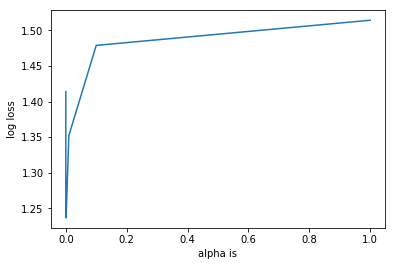

In [0]:
alpha=[10**x for x in range(-5,1)]
cvlogerrorarray=[]
for i in alpha:
    clf=SGDClassifier(loss='log',alpha=i,penalty='l2')
    clf.fit(traingenefeaturetfidfcoding,y_train)
    sigmaclf=CalibratedClassifierCV(clf,method='sigmoid')
    sigmaclf.fit(traingenefeaturetfidfcoding,y_train)
    predictedy=sigmaclf.predict_proba(cvgenefeaturetfidfcoding)
    cvlogerrorarray.append(log_loss(y_cv,predictedy))
    print(log_loss(y_cv,predictedy))
fig,ax=plt.subplots()
ax.plot(alpha,cvlogerrorarray)
bestalpha=np.argmin(cvlogerrorarray)
clf=SGDClassifier(alpha=alpha[bestalpha],penalty='l2',loss='log')
clf.fit(traingenefeaturetfidfcoding,y_train)
sigmaclf=CalibratedClassifierCV(clf,method='sigmoid')
sigmaclf.fit(traingenefeaturetfidfcoding,y_train)
predictedy1=sigmaclf.predict_proba(cvgenefeaturetfidfcoding)
print(log_loss(y_cv,predictedy1))
predictedy2=sigmaclf.predict_proba(traingenefeaturetfidfcoding)
print(log_loss(y_train,predictedy2))
predictedy3=sigmaclf.predict_proba(testgenefeaturetfidfcoding)
print(log_loss(y_test,predictedy3))
plt.xlabel('alpha is')
plt.ylabel('log loss')

In [0]:
variationvect=TfidfVectorizer()
trainvariationfeaturetfidfcoding=variationvect.fit_transform(train_df['Variation'])
testvariationfeaturetfidfcoding=variationvect.transform(test_df['Variation'])
cvvariationfeaturetfidfcoding=variationvect.transform(cv_df['Variation'])
print(trainvariationfeaturetfidfcoding.shape)
print(testvariationfeaturetfidfcoding.shape)
print(cvvariationfeaturetfidfcoding.shape)

(2124, 1952)
(664, 1952)
(532, 1952)


In [0]:
countvariationvect=CountVectorizer()
counttrainvariationfeatureonehotcoding=countvariationvect.fit_transform(train_df['Variation'])
counttestvariationfeatureonehotcoding=countvariationvect.transform(test_df['Variation'])
countcvvariationfeatureonehotcoding=countvariationvect.transform(cv_df['Variation'])
print(counttrainvariationfeatureonehotcoding.shape)
print(counttestvariationfeatureonehotcoding.shape)
print(countcvvariationfeatureonehotcoding.shape)

(2124, 1952)
(664, 1952)
(532, 1952)


1.7127342943010861
1.7136304303533505
1.71338085303598
1.7132324046771858
1.7125872530955601
1.712901559425975
1.1405579121284057
1.7128692566656547
1.7245763292959781


Text(0, 0.5, 'log loss')

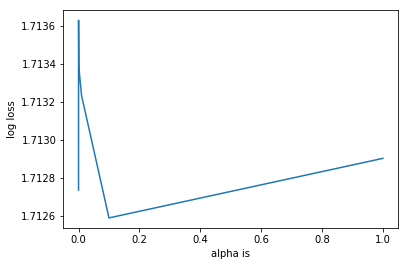

In [0]:
alpha=[10**x for x in range(-5,1)]
cvlogerrorarray1=[]
for i in alpha:
    clf=SGDClassifier(alpha=i,loss='log',penalty='l2')
    clf.fit(trainvariationfeaturetfidfcoding,y_train)
    sigmalclf=CalibratedClassifierCV(clf,method='sigmoid')
    sigmaclf.fit(trainvariationfeaturetfidfcoding,y_train)
    predicted=sigmaclf.predict_proba(cvvariationfeaturetfidfcoding)
    cvlogerrorarray1.append(log_loss(y_cv,predicted))
    print(log_loss(y_cv,predicted))
fig,ax=plt.subplots()
ax.plot(alpha,cvlogerrorarray1)
bestalpha=np.argmin(cvlogerrorarray1)
clf=SGDClassifier(alpha=alpha[bestalpha],loss='log',penalty='l2')
clf.fit(trainvariationfeaturetfidfcoding,y_train)
sigmaclf.fit(trainvariationfeaturetfidfcoding,y_train)
predictedy1=sigmaclf.predict_proba(trainvariationfeaturetfidfcoding)
print(log_loss(y_train,predictedy1))
predictedy2=sigmaclf.predict_proba(cvvariationfeaturetfidfcoding)
print(log_loss(y_cv,predictedy2))
predictedy3=sigmaclf.predict_proba(testvariationfeaturetfidfcoding)
print(log_loss(y_test,predictedy3))
plt.xlabel('alpha is')
plt.ylabel('log loss')

In [0]:
textvectorizer=TfidfVectorizer(min_df=4)
from sklearn.preprocessing import normalize
traintextfeaturetfidfcoding=textvectorizer.fit_transform(train_df['Text'])
traintextfeaturetfidfcoding=normalize(traintextfeaturetfidfcoding,axis=0)
testtextfeaturetfidfcoding=textvectorizer.transform(test_df['Text'])
testtextfeaturetfidfcoding=normalize(testtextfeaturetfidfcoding,axis=0)
cvtextfeaturetfidfcoding=textvectorizer.transform(cv_df['Text'])
cvtextfeaturetfidfcoding=normalize(cvtextfeaturetfidfcoding,axis=0)

for given value oif alpha 1e-05 log loss is 1.366121563160487
for given value oif alpha 0.0001 log loss is 1.343172307016274
for given value oif alpha 0.001 log loss is 1.2033221967294945
for given value oif alpha 0.01 log loss is 1.330858484213874
for given value oif alpha 0.1 log loss is 1.4873733360077137
for given value oif alpha 1 log loss is 1.7178059115214293
1.4152929992890517
1.7178059115214293
1.5450234095760602


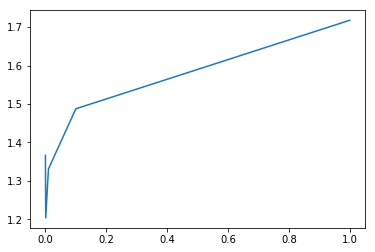

In [0]:
cvlogerrorarr=[]
alpha=[10**x for x in range(-5,1)]
for i in alpha:
    clf=SGDClassifier(alpha=i,loss='log',penalty='l2')
    clf.fit(traintextfeaturetfidfcoding,y_train)
    sigmodel=CalibratedClassifierCV(clf,method='sigmoid')
    sigmodel.fit(traintextfeaturetfidfcoding,y_train)
    predictedy=sigmodel.predict_proba(cvtextfeaturetfidfcoding)
    print('for given value oif alpha',i,'log loss is',log_loss(y_cv,predictedy))
    cvlogerrorarr.append(log_loss(y_cv,predictedy))
bestalpha=np.argmin(cvlogerrorarr)
fig,ax=plt.subplots()
ax.plot(alpha,cvlogerrorarr)
clftext=SGDClassifier(alpha=alpha[bestalpha],loss='log',penalty='l2')
clftext.fit(traintextfeaturetfidfcoding,y_train)
sigmatext=CalibratedClassifierCV(clftext,method='sigmoid')
sigmatext.fit(traintextfeaturetfidfcoding,y_train)
predictedy1=sigmodel.predict_proba(traintextfeaturetfidfcoding)
print(log_loss(y_train,predictedy1))
predictedy2=sigmodel.predict_proba(cvtextfeaturetfidfcoding)
print(log_loss(y_cv,predictedy2))
predictedy3=sigmodel.predict_proba(testtextfeaturetfidfcoding)
print(log_loss(y_test,predictedy3))

In [0]:
def getimportantfeaturenames(indices,text,gene,variation,numberoffeatures):
    genecountvec=TfidfVectorizer()
    variationcountvec=TfidfVectorizer()
    textcountvec=TfidfVectorizer()
    genevec=genecountvec.fit(train_df['Gene'])
    varvec=variationcountvec.fit(train_df['Variation'])
    textvec=textcountvec.fit(train_df['Text'])
    feature1length=len(genevec.get_feature_names())
    feature2length=len(varvec.get_feature_names())
    wordpresent=0
    for i,v in enumerate(indices):
        if (v<feature1length):
            word=genevec.get_feature_names()[v]
            yes_no=True if word==gene else False
            if yes_no:
                wordpresent+=1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif(v<feature1length+feature2length):
            word=varvec.get_feature_names()[v-(feature1length)]
            yes_no=True if word==variation else False
            if yes_no:
                wordpresent+=1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = textvec.get_feature_names()[v-(feature1length+feature2length)]
            yes_no = True if word in text.split() else False
            if yes_no:
                wordpresent += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",numberoffeatures," features ", wordpresent, "are present in query point")
            
            

In [0]:
traingenevariationonehotencoding=hstack((traingenefeaturetfidfcoding,trainvariationfeaturetfidfcoding))
testgenevariationonehotencoding=hstack((testgenefeaturetfidfcoding,testvariationfeaturetfidfcoding))
cvgenevariationfeatureonehotencoding=hstack((cvgenefeaturetfidfcoding,cvvariationfeaturetfidfcoding))
traintotalfeaturetfidfcoding=hstack((traingenevariationonehotencoding,traintextfeaturetfidfcoding)).tocsr()
testtotalfeaturetfidfcoding=hstack((testgenevariationonehotencoding,testtextfeaturetfidfcoding)).tocsr()
cvtotalfeaturetfidfcoding=hstack((cvgenevariationfeatureonehotencoding,cvtextfeaturetfidfcoding)).tocsr()

for given value of alpha 0.0001 1.310606897444141
for given value of alpha 0.001 1.3066725352233228
for given value of alpha 0.01 1.2913049077474072
for given value of alpha 0.1 1.2694934674533314
for given value of alpha 1 1.31503844039005
for given value of alpha 10 1.386301622929047
for given value of alpha 100 1.308013553236082
for given value of alpha 1000 1.2541397824183083
for given best alpha 1.2541397824183083 for crossvalidation
for given best alpha 1.168021863128508 for test set


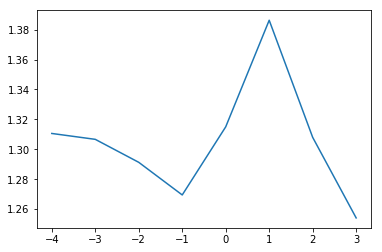

In [0]:
alpha=[0.0001,0.001,0.01,0.1,1,10,100,1000]
cvlogerrorarray=[]
for i in alpha:
    clf=MultinomialNB(alpha=i)
    clf.fit(traintotalfeaturetfidfcoding,y_train)
    sigmaclf=CalibratedClassifierCV(clf,method='sigmoid')
    sigmaclf.fit(traintotalfeaturetfidfcoding,y_train)
    sigmaprobabilities=sigmaclf.predict_proba(cvtotalfeaturetfidfcoding)
    cvlogerrorarray.append(log_loss(y_cv,sigmaprobabilities))
    print('for given value of alpha',i,log_loss(y_cv,sigmaprobabilities))
fig,ax=plt.subplots()
ax.plot(np.log10(alpha),cvlogerrorarray)
bestalpha=np.argmin(cvlogerrorarray)
model=MultinomialNB(alpha=alpha[bestalpha])
model.fit(traintotalfeaturetfidfcoding,y_train)
sigmaclf1=CalibratedClassifierCV(model,method='sigmoid')
sigmaclf1.fit(traintotalfeaturetfidfcoding,y_train)
sigmaprobabilities1=sigmaclf1.predict_proba(cvtotalfeaturetfidfcoding)
print('for given best alpha',log_loss(y_cv,sigmaprobabilities1),'for crossvalidation')
sigmaprobabilities12=sigmaclf1.predict_proba(testtotalfeaturetfidfcoding)
print('for given best alpha',log_loss(y_test,sigmaprobabilities12),'for test set')

In [0]:
#printing the important features

#clf = SGDClassifier(alpha=1000, penalty='l2', loss='log', random_state=42)
sigmaclf1.fit(traintotalfeaturetfidfcoding,y_train)
test_point_index = 3
no_feature = 500
predicted_cls = sigmaclf1.predict(testtotalfeaturetfidfcoding[3])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sigmaclf1.predict_proba(testtotalfeaturetfidfcoding[test_point_index]),4))
print("Actual Class :", y_test[3])



Predicted Class : 7
Predicted Class Probabilities: [[4.890e-02 1.272e-01 3.600e-03 4.160e-02 2.780e-02 2.850e-02 7.175e-01
  4.200e-03 6.000e-04]]
Actual Class : 7


In [0]:
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:500]
print("-"*50)
getimportantfeaturenames(indices[0], test_df['Text'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

--------------------------------------------------
144 Text feature [capturing] present in test data point [True]
237 Text feature [contribution] present in test data point [True]
249 Text feature [cutpoint] present in test data point [True]
252 Text feature [53] present in test data point [True]
Out of the top  500  features  4 are present in query point



#TASK1 STARTS FROM HERE 
#WE HAVE SEENT THE PERFORMANCE OF THE MODEL USING THE TFIDF VECTORIZER NOW WE GONNA SEE THE PERFORMANCE OF THE MODELS BASED ON THE COUNT VECTORIZER
# Task1 using the count vectorizer 

***TASK1***
* applyall these methods on count vectorzer
* actaully these tasks can be performed seperately
* but disadvantage of doing that is we cannot comapre the models

In [0]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from nltk.corpus import stopwords
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import hstack
from sklearn.metrics.classification import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [1]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 19.7MB/s 


In [0]:
link = 'https://drive.google.com/open?id=1ClZQUuBTtIatBFZpPz7rXimqukBUDPWc' # The shareable link

In [3]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1ClZQUuBTtIatBFZpPz7rXimqukBUDPWc


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('personalcancerassignmentdata.csv')  


In [0]:
datas=pd.read_csv('personalcancerassignmentdata.csv')

In [0]:
datas.rename(columns={'TEXT':'Text'}, inplace=True)

In [7]:
datas.head(5)

,Unnamed: 0,ID,Gene,Variation,Class,Text,genevariation
0,0,0,FAM58A,Truncating_Mutations,1,cyclin dependent kinases cdks regulate variety...,FAM58A Truncating_Mutations
1,1,1,CBL,W802*,2,abstract background non small cell lung cancer...,CBL W802*
2,2,2,CBL,Q249E,2,abstract background non small cell lung cancer...,CBL Q249E
3,3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...,CBL N454D
4,4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...,CBL L399V


In [0]:
datanew=datas

In [0]:
task1data=datanew
task1y=task1data['Class']
task1data=task1data[['Text','Variation','Gene']]

In [10]:
task1data.head(5)

,Text,Variation,Gene
0,cyclin dependent kinases cdks regulate variety...,Truncating_Mutations,FAM58A
1,abstract background non small cell lung cancer...,W802*,CBL
2,abstract background non small cell lung cancer...,Q249E,CBL
3,recent evidence demonstrated acquired uniparen...,N454D,CBL
4,oncogenic mutations monomeric casitas b lineag...,L399V,CBL


##SPLITTING THE DATA INTO THE TRAIN DATA TEST DATA AND CV DATA  AND SPLITTING THE DATA BASED ON THE YLABEL OF DATA SO THAT WE GET THE BALANCED DATA.

In [105]:
from sklearn.model_selection import train_test_split
tx,testx,ty,testy=train_test_split(task1data,task1y,test_size=0.2,stratify=task1y)
print(tx.shape)
print(ty.shape)
print(testx.shape)
print(testy.shape)

(2656, 3)
(2656,)
(665, 3)
(665,)


In [106]:
print(testx.shape)
print(testy.shape)

(665, 3)
(665,)


In [107]:
print(type(testy))

<class 'pandas.core.series.Series'>


In [108]:
trainx,cvx,trainy,cvy=train_test_split(tx,ty,test_size=0.2,stratify=ty)
print(trainx.shape)
print(cvx.shape)
print(trainy.shape)
print(cvy.shape)

(2124, 3)
(532, 3)
(2124,)
(532,)


###AS A PART OF TASK1 WE ARE USING THE COUNTVECTORIZER INSTEAD OF USING THE TFIDF VECTORIZER. WE WILL STACK THE FEATURES OF ADATA GENE,VARIATION,TEXT DATA WE WILL ONEHOT ENCODE THEM AND STACK THEM. AND PERFORM THE MODELS ON THEM.

In [109]:
from sklearn.feature_extraction.text import CountVectorizer
genevector=CountVectorizer()
traingenefeatureonehotencoding=genevector.fit_transform(trainx['Gene'])
testgenefeatureonehotencoding=genevector.transform(testx['Gene'])
cvgenefeatureonehotencoding=genevector.transform(cvx['Gene'])
print(traingenefeatureonehotencoding.shape)
print(testgenefeatureonehotencoding.shape)
print(cvgenefeatureonehotencoding.shape)

(2124, 233)
(665, 233)
(532, 233)


In [0]:
from sklearn.preprocessing import normalize
traingenefeatureonehotencoding=normalize(traingenefeatureonehotencoding)
testgenefeatureonehotencoding=normalize(testgenefeatureonehotencoding)
cvgenefeatureonehotencoding=normalize(cvgenefeatureonehotencoding)

In [111]:
variationvector=CountVectorizer()
trainvariationfeatureonehotencoding=variationvector.fit_transform(trainx['Variation'])
testvariationfeatureonehotencoding=variationvector.transform(testx['Variation'])
cvvariationfeatureonehotencoding=variationvector.transform(cvx['Variation'])
print(trainvariationfeatureonehotencoding.shape)
print(testvariationfeatureonehotencoding.shape)
print(cvvariationfeatureonehotencoding.shape)


(2124, 1960)
(665, 1960)
(532, 1960)


In [0]:
trainvariationfeatureonehotencoding=normalize(trainvariationfeatureonehotencoding)
testvariationfeatureonehotencoding=normalize(testvariationfeatureonehotencoding)
cvvariationfeatureonehotencoding=normalize(cvvariationfeatureonehotencoding)

In [113]:
textvector=CountVectorizer(min_df=4)
traintextfeatureonehotencoding=textvector.fit_transform(trainx['Text'])
testtextfeatureonehotencoding=textvector.transform(testx['Text'])
cvtextfeatureonehotencoding=textvector.transform(cvx['Text'])
print(traintextfeatureonehotencoding.shape)
print(testtextfeatureonehotencoding.shape)
print(cvtextfeatureonehotencoding.shape)

(2124, 45031)
(665, 45031)
(532, 45031)


In [0]:
traintextfeatureonehotencoding=normalize(traintextfeatureonehotencoding)
testtextfeatureonehotencoding=normalize(testtextfeatureonehotencoding)
cvtextfeatureonehotencoding=normalize(cvtextfeatureonehotencoding)

* we will train models like
* 1.naive bayes model
* 2.knn model
* 3.logistic regression
* 4.linear svm
* 5.random forest classifier
* 6.stacking models
* 7.max voting classifier

In [115]:
from scipy.sparse import hstack
task1traindata=hstack((traingenefeatureonehotencoding,trainvariationfeatureonehotencoding,traintextfeatureonehotencoding)).tocsr()
task1testdata=hstack((testgenefeatureonehotencoding,testvariationfeatureonehotencoding,testtextfeatureonehotencoding)).tocsr()
task1cvdata=hstack((cvgenefeatureonehotencoding,cvvariationfeatureonehotencoding,cvtextfeatureonehotencoding)).tocsr()
print(task1traindata.shape)
print(task1testdata.shape)
print(task1cvdata.shape)

(2124, 47224)
(665, 47224)
(532, 47224)


In [116]:
print(trainy.shape)
print(cvy.shape)
print(testy.shape)

(2124,)
(532,)
(665,)


# BEFORE TRAINING THE MODELS UTILITY FUNCTION FOR PLOTTING THE CONFUSION MATRIX, REPORTING LOG LOSS,AND GETTING THE IMPORTANT FEATURE NAMES.

In [0]:

def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [0]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [0]:

def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(min_df=4)
    
    gene_vec = gene_count_vec.fit(trainx['Gene'])
    var_vec  = var_count_vec.fit(trainx['Variation'])
    text_vec = text_count_vec.fit(trainx['Text'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

# THE IMPORTANT UTITLITY FUNCTION THAT WE CAN USE IN THE CLASSIFICATION IS THE CONFUSUION MATRIX
#ALONG  WITH THE CONFUSION MATRIX WE CAN ALSO PLOT THE PRECISION AND RECALL AMTRIX IF WE TAKE THE PROBABILTY VALUE ALON THE AXIS=1 THEN IT IS PRECISION MATRIX. IF WE TAE THE PROBABILITY VALUE ALONG THE AXIS =0 THEN IT IS RECALL MATRIX.

In [0]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    
    B =(C/C.sum(axis=0))
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

#naive bayesmodel


for alpha 1e-05
log loss 1.1795282458888587
for alpha 0.0001
log loss 1.1798550347886276
for alpha 0.001
log loss 1.187760320183947
for alpha 0.01
log loss 1.181245446719244
for alpha 0.1
log loss 1.2340868196246202
for alpha 1
log loss 1.348939471938856
for alpha 10
log loss 1.3304773920084219
for alpha 100
log loss 1.3256155046613334
for alpha 1000
log loss 1.332157848006163


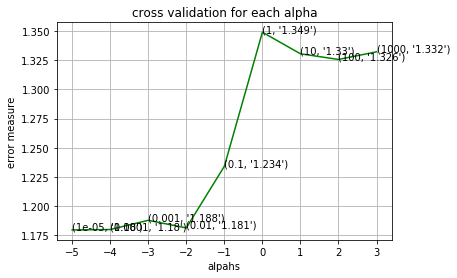

losses for usong best alpha firring the train data
log losses for train cv test datas
(2124, 9)
for using besst alpha for train datathe alpha value is 1e-05 logloss is 0.5853816267082195
for using besst alpha for cv data the alpha value is 1e-05 logloss is 1.1795282458888587
for using besst alpha for test data the alpha value is 1e-05 logloss is 1.1202416510096034


In [121]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
cvlogerrorarray=[]
alpha=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
for i in alpha:
  print('for alpha',i)
  model=MultinomialNB(alpha=i)
  model.fit(task1traindata,trainy)
  sigmamodel=CalibratedClassifierCV(model,method='sigmoid')
  sigmamodel.fit(task1traindata,trainy)
  sigmaprob=sigmamodel.predict_proba(task1cvdata)
  cvlogerrorarray.append(log_loss(cvy,sigmaprob,labels=model.classes_))
  print('log loss',log_loss(cvy,sigmaprob))
fig,ax=plt.subplots()
ax.plot(np.log10(alpha),cvlogerrorarray,c='g')
for i,txt in enumerate(np.round(cvlogerrorarray,3)):
  ax.annotate((alpha[i],str(txt)),(np.log10(alpha[i]),cvlogerrorarray[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title('cross validation for each alpha')
plt.xlabel('alpahs')
plt.ylabel('error measure')
plt.show()
bestalpha=np.argmin(cvlogerrorarray)
print('losses for usong best alpha firring the train data')
model1=MultinomialNB(alpha=alpha[bestalpha])
model1.fit(task1traindata,trainy)
sigmamodel1=CalibratedClassifierCV(model1,method='sigmoid')
sigmamodel1.fit(task1traindata,trainy)
print('log losses for train cv test datas')
predicty1=sigmamodel1.predict_proba(task1traindata)
print(predicty1.shape)
print('for using besst alpha for train datathe alpha value is',alpha[bestalpha],'logloss is',log_loss(trainy,predicty1,labels=model.classes_))
predicty1=sigmamodel1.predict_proba(task1cvdata)
print('for using besst alpha for cv data the alpha value is',alpha[bestalpha],'logloss is',log_loss(cvy,predicty1,labels=model.classes_))
predicty1=sigmamodel1.predict_proba(task1testdata)
print('for using besst alpha for test data the alpha value is',alpha[bestalpha],'logloss is',log_loss(testy,predicty1,labels=model.classes_))


log loss over cv data 1.348939471938856
-------------------- Confusion matrix --------------------


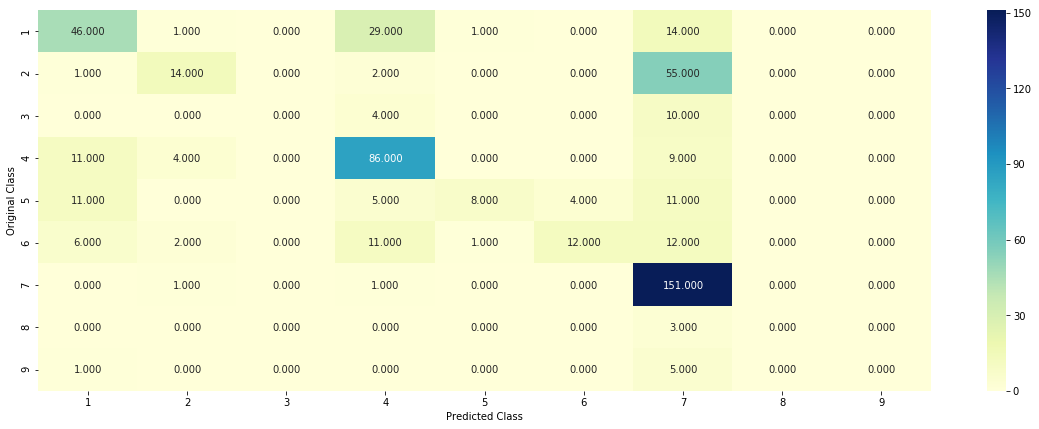

-------------------- Precision matrix (Columm Sum=1) --------------------


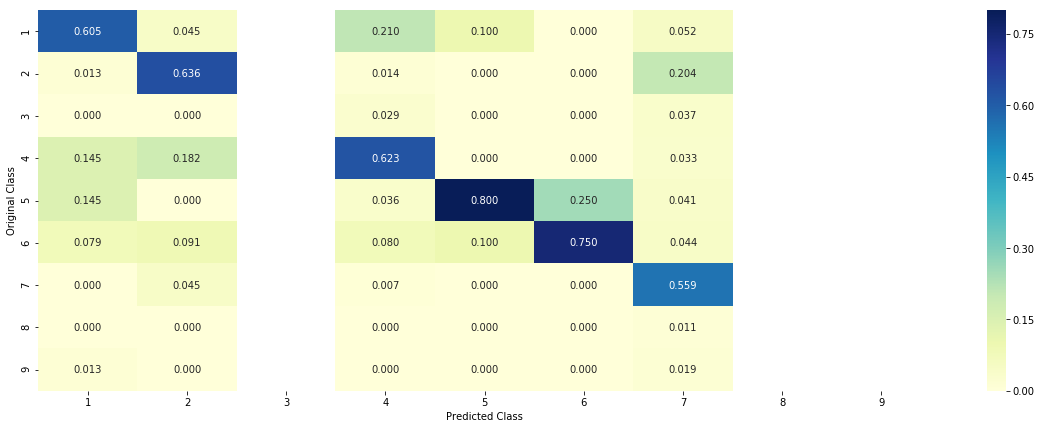

-------------------- Recall matrix (Row sum=1) --------------------


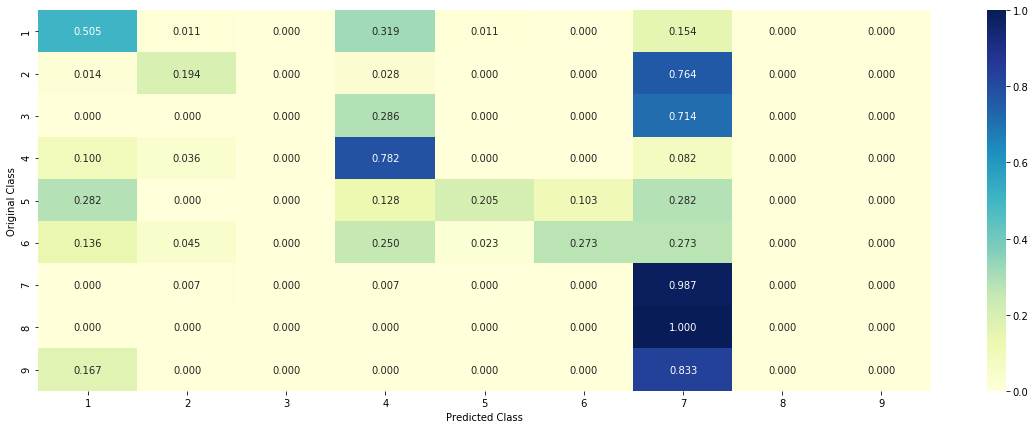

In [122]:
#model to plot the confusion matrix
testmodel=MultinomialNB(alpha=1)
testmodel.fit(task1traindata,trainy)
sigmatestmodel=CalibratedClassifierCV(testmodel,method='sigmoid')
sigmatestmodel.fit(task1traindata,trainy)
sigmaprobabilities=sigmatestmodel.predict_proba(task1cvdata)
print('log loss over cv data',log_loss(cvy,sigmaprobabilities))
plot_confusion_matrix(cvy,sigmatestmodel.predict(task1cvdata))

In [123]:
#***coef_ is nothing but the weights of each feature***
#we want to print the important features
weights=-testmodel.coef_[1]
importantweights=np.argsort(weights)[:100]
print(importantweights)

[30351 12344 33417    62   110 30340   744 12333 19554 26181 11626 19561
    27 18498  7869 20988 17666 44330 26230 45197  8344  8134 18891 44342
     0 35780  2521 30329 10857 20347  7388   157   191   328 16768 18771
 13122 42594 15303 24128 23907    96   158 44449 44430 44026 28636 21040
  7369 37230 33416 38158 41705 11878 38113 16699 32253    66  2685 38204
  2814 40326 20074 39969 21823 10390 40415 33562  1455 39368  3851 31959
  9371 46405 45185 30331 42040 16206  3127 41695    83 31871 37977  3045
 16458 27438 37107 23280 27451 43379 41023 33792 46301 24434 23420 33396
  3485 35389   144   186]


In [0]:
testyy=np.array(testy)

In [125]:
#printing the important features

#clf = SGDClassifier(alpha=1000, penalty='l2', loss='log', random_state=42)
sigmatestmodel.fit(task1traindata,trainy)
test_point_index = 2
no_feature = 500
predicted_cls = sigmatestmodel.predict(task1testdata[2])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sigmatestmodel.predict_proba(task1testdata[test_point_index]),4))
print("Actual Class :", testyy[2])



Predicted Class : 7
Predicted Class Probabilities: [[0.0789 0.1151 0.0277 0.0669 0.0619 0.0609 0.5709 0.0063 0.0114]]
Actual Class : 2


In [126]:
indices = np.argsort(-testmodel.coef_)[predicted_cls-1][:,:500]
print("-"*50)
get_impfeature_names(indices[0], testx['Text'].iloc[test_point_index],testx['Gene'].iloc[test_point_index],testx['Variation'].iloc[test_point_index], no_feature)

--------------------------------------------------
0 Text feature [mutations] present in test data point [True]
1 Text feature [cells] present in test data point [True]
2 Text feature [cell] present in test data point [True]
4 Text feature [mutation] present in test data point [True]
5 Text feature [fig] present in test data point [True]
6 Text feature [figure] present in test data point [True]
7 Text feature [kinase] present in test data point [True]
8 Text feature [patients] present in test data point [True]
9 Text feature [al] present in test data point [True]
10 Text feature [et] present in test data point [True]
11 Text feature [cancer] present in test data point [True]
12 Text feature [mutant] present in test data point [True]
14 Text feature [expression] present in test data point [True]
15 Text feature [activity] present in test data point [True]
16 Text feature [activation] present in test data point [True]
17 Text feature [domain] present in test data point [True]
19 Text fea

# kneighbors classifier

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
testyy=np.array(testy)


for alpha 5
log loss 1.1061253174926213
for alpha 11
log loss 1.1390692091569685
for alpha 15
log loss 1.147917553089887
for alpha 21
log loss 1.1677774618446912
for alpha 31
log loss 1.1993212560371174
for alpha 41
log loss 1.2294665241648277
for alpha 51
log loss 1.2600367721675176
for alpha 99
log loss 1.3064653329214084


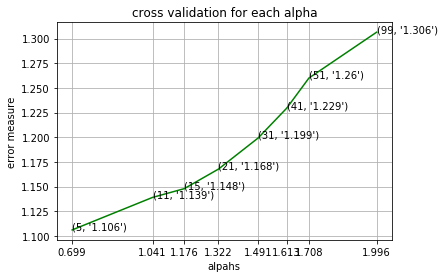

losses for usong best alpha firring the train data
log losses for train cv test datas
(2124, 9)
for using besst alpha for train datathe alpha value is 5 logloss is 1.2660987813573554
for using besst alpha for cv data the alpha value is 5 logloss is 1.692750076006604
for using besst alpha for test data the alpha value is 5 logloss is 1.629603533201788


In [73]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
cvlogerrorarray=[]
alpha=[5,11,15,21,31,41,51,99]
for i in alpha:
  print('for alpha',i)
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(task1traindata,trainy)
  sigmamodel=CalibratedClassifierCV(model,method='sigmoid')
  sigmamodel.fit(task1traindata,trainy)
  sigmaprob=sigmamodel.predict_proba(task1cvdata)
  cvlogerrorarray.append(log_loss(cvy,sigmaprob,labels=model.classes_))
  print('log loss',log_loss(cvy,sigmaprob))
fig,ax=plt.subplots()
ax.plot(np.log10(alpha),cvlogerrorarray,c='g')
for i,txt in enumerate(np.round(cvlogerrorarray,3)):
  ax.annotate((alpha[i],str(txt)),(np.log10(alpha[i]),cvlogerrorarray[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title('cross validation for each alpha')
plt.xlabel('alpahs')
plt.ylabel('error measure')
plt.show()
bestalpha=np.argmin(cvlogerrorarray)
print('losses for usong best alpha firring the train data')
model1=MultinomialNB(alpha=alpha[bestalpha])
model1.fit(task1traindata,trainy)
sigmamodel1=CalibratedClassifierCV(model1,method='sigmoid')
sigmamodel1.fit(task1traindata,trainy)
print('log losses for train cv test datas')
predicty1=sigmamodel1.predict_proba(task1traindata)
print(predicty1.shape)
print('for using besst alpha for train datathe alpha value is',alpha[bestalpha],'logloss is',log_loss(trainy,predicty1,labels=model.classes_))
predicty1=sigmamodel1.predict_proba(task1cvdata)
print('for using besst alpha for cv data the alpha value is',alpha[bestalpha],'logloss is',log_loss(cvy,predicty1,labels=model.classes_))
predicty1=sigmamodel1.predict_proba(task1testdata)
print('for using besst alpha for test data the alpha value is',alpha[bestalpha],'logloss is',log_loss(testy,predicty1,labels=model.classes_))


log loss over cv data 1.1390692091569685
-------------------- Confusion matrix --------------------


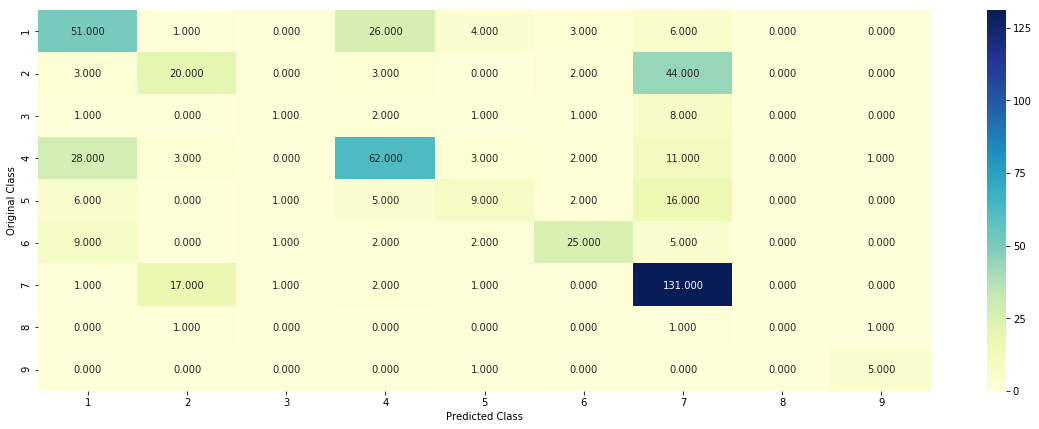

-------------------- Precision matrix (Columm Sum=1) --------------------


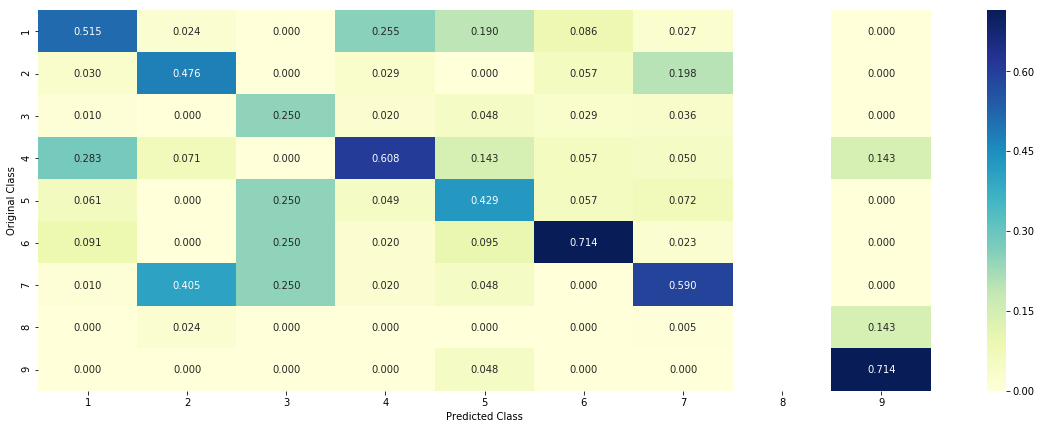

-------------------- Recall matrix (Row sum=1) --------------------


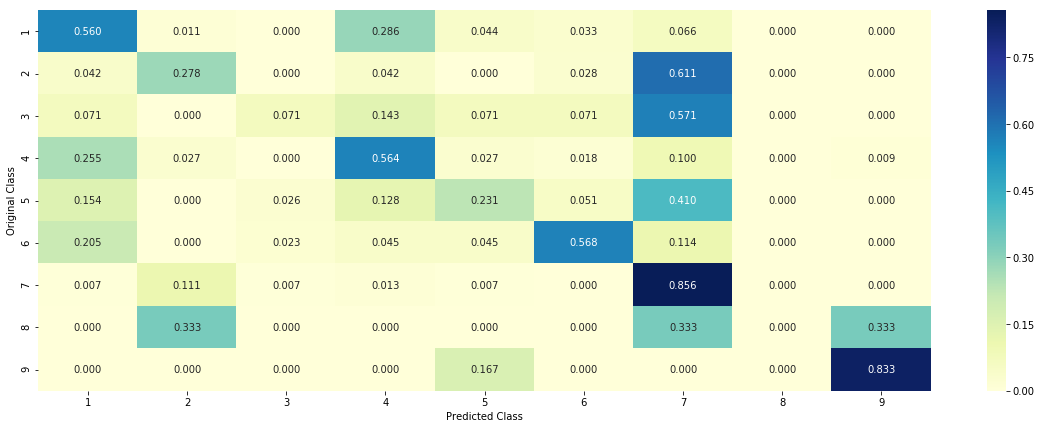

In [74]:
#model to plot the confusion matrix
testmodel=KNeighborsClassifier(n_neighbors=11)
testmodel.fit(task1traindata,trainy)
sigmatestmodel=CalibratedClassifierCV(testmodel,method='sigmoid')
sigmatestmodel.fit(task1traindata,trainy)
sigmaprobabilities=sigmatestmodel.predict_proba(task1cvdata)
print('log loss over cv data',log_loss(cvy,sigmaprobabilities))
plot_confusion_matrix(cvy,sigmatestmodel.predict(task1cvdata))

# LOGISTIC REGRESSION WITH HYERPARAMETER TUNING

### we are using with the balanced class weight WITH SGD CLASSIFIER USING LOGLOSS AS METRIC
### WE WILL PRINT THE IMPORTANT FEATURE NAMES FOR WHEN THE PREDICTED LABEL IS TRUE AND PREDICTED LABEL IS FALSE.

for alpha = 1e-06
Log Loss : 1.0917896794289867
for alpha = 1e-05
Log Loss : 1.0368523259316993
for alpha = 0.0001
Log Loss : 0.9724716484170595
for alpha = 0.001
Log Loss : 1.0394795500645848
for alpha = 0.01
Log Loss : 1.2178967192814099
for alpha = 0.1
Log Loss : 1.4915368790449361
for alpha = 1
Log Loss : 1.6143569536237983
for alpha = 10
Log Loss : 1.6303123595037692
for alpha = 100
Log Loss : 1.6320719030830637


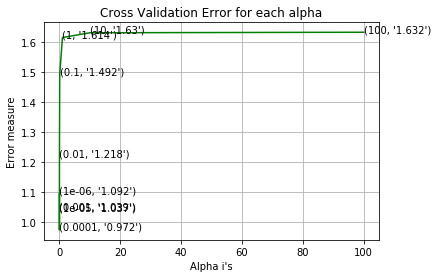

For values of best alpha =  0.0001 The train log loss is: 0.44444897009196854
For values of best alpha =  0.0001 The cross validation log loss is: 0.9724716484170595
For values of best alpha =  0.0001 The test log loss is: 0.9685838226135148


In [127]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(task1traindata,trainy)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(task1traindata, trainy)
    sig_clf_probs = sig_clf.predict_proba(task1cvdata)
    cv_log_error_array.append(log_loss(cvy, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cvy, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(task1traindata, trainy)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(task1traindata,trainy)

predict_y = sig_clf.predict_proba(task1traindata)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(trainy, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(task1cvdata)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(cvy, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(task1testdata)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(testy, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.1.2. Testing the model with best hyper paramters</h4>

Log loss : 0.9724716484170595
Number of mis-classified points : 0.3458646616541353
-------------------- Confusion matrix --------------------


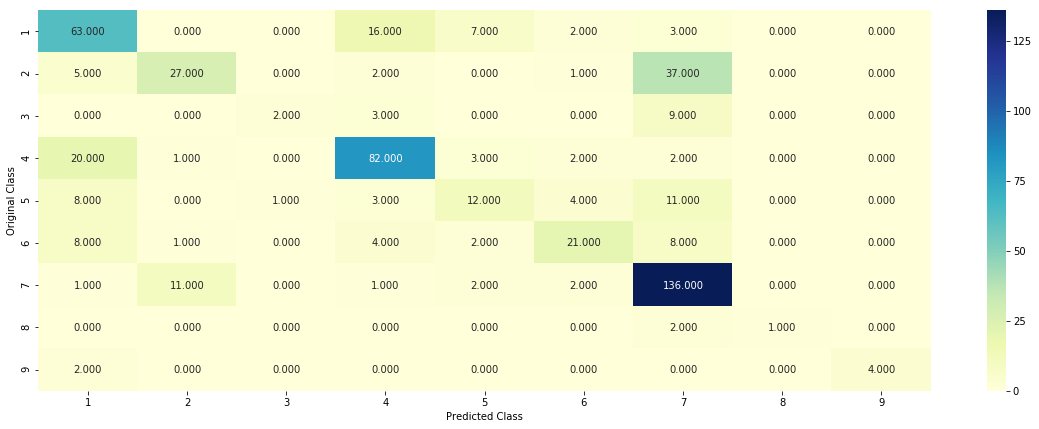

-------------------- Precision matrix (Columm Sum=1) --------------------


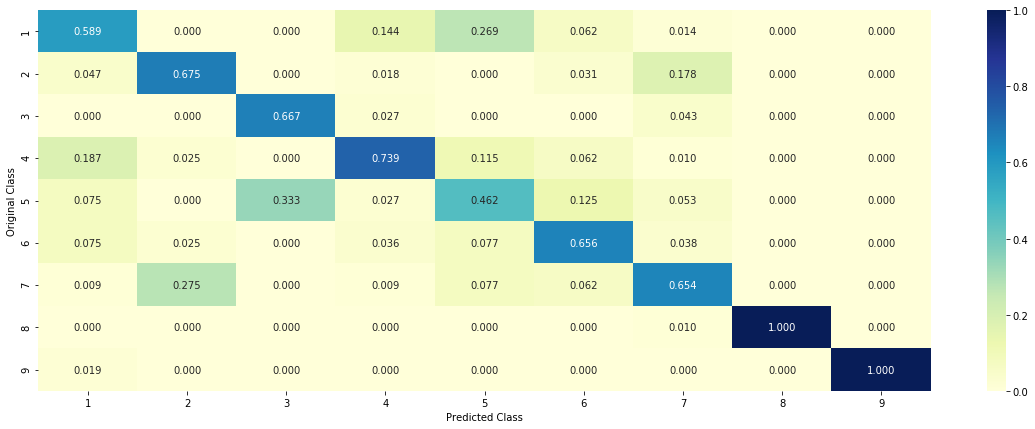

-------------------- Recall matrix (Row sum=1) --------------------


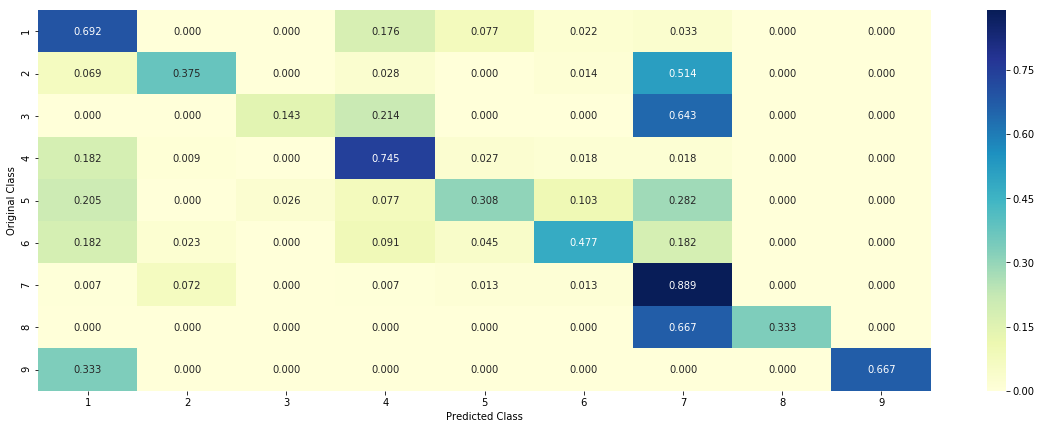

In [128]:

clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(task1traindata, trainy,task1cvdata, cvy, clf)

<h4>4.3.1.3. Feature Importance</h4>

In [0]:
def get_imp_feature_names(text, indices, removed_ind = []):
    word_present = 0
    tabulte_list = []
    incresingorder_ind = 0
    for i in indices:
        if i < train_gene_feature_onehotCoding.shape[1]:
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"])
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = train_text_features[i]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
            tabulte_list.append([incresingorder_ind,train_text_features[i], yes_no])
        incresingorder_ind += 1
    print(word_present, "most importent features are present in our query point")
    print("-"*50)
    print("The features that are most importent of the ",predicted_cls[0]," class:")
    print (tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))

<h5>4.3.1.3.1. Correctly Classified point</h5>

In [130]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(task1traindata,trainy)
test_point_index = 2
no_feature = 500
predicted_cls = clf.predict(task1testdata[2])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(clf.predict_proba(task1testdata[2]),4))
print("Actual Class :", testyy[2])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], testx['Text'].iloc[test_point_index],testx['Gene'].iloc[test_point_index],testx['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[6.320e-02 5.620e-02 1.370e-02 1.170e-02 1.456e-01 1.278e-01 5.816e-01
  0.000e+00 2.000e-04]]
Actual Class : 2
--------------------------------------------------
1 Text feature [activation] present in test data point [True]
17 Text feature [lung] present in test data point [True]
27 Text feature [cells] present in test data point [True]
50 Text feature [leukemia] present in test data point [True]
56 Text feature [tumors] present in test data point [True]
70 Text feature [found] present in test data point [True]
84 Text feature [cancers] present in test data point [True]
106 Text feature [expressing] present in test data point [True]
135 Text feature [overexpression] present in test data point [True]
142 Text feature [positive] present in test data point [True]
189 Text feature [showed] present in test data point [True]
222 Text feature [14] present in test data point [True]
232 Text feature [previously] present in test data point [Tr

<h5>4.3.1.3.2. Incorrectly Classified point</h5>

In [131]:
test_point_index = 100
no_feature = 500
predicted_cls = clf.predict(task1testdata[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(clf.predict_proba(task1testdata[test_point_index]),4))
print("Actual Class :", testyy[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], testx['Text'].iloc[test_point_index],testx['Gene'].iloc[test_point_index],testx['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0245 0.2181 0.0062 0.0176 0.0122 0.0393 0.6811 0.     0.001 ]]
Actual Class : 7
--------------------------------------------------
1 Text feature [activation] present in test data point [True]
4 Text feature [egfr] present in test data point [True]
5 Text feature [ras] present in test data point [True]
6 Text feature [flt3] present in test data point [True]
10 Text feature [exon] present in test data point [True]
17 Text feature [lung] present in test data point [True]
20 Text feature [fusion] present in test data point [True]
25 Text feature [codon] present in test data point [True]
27 Text feature [cells] present in test data point [True]
38 Text feature [catenin] present in test data point [True]
49 Text feature [itd] present in test data point [True]
55 Text feature [kit] present in test data point [True]
56 Text feature [tumors] present in test data point [True]
67 Text feature [myc] present in test data point [True]
70 Text f

<h3>4.3.2. Without Class balancing</h3>

<h4>4.3.2.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.0907063646775044
for alpha = 1e-05
Log Loss : 1.0485395770450705
for alpha = 0.0001
Log Loss : 0.974345131564849
for alpha = 0.001
Log Loss : 1.038775998788213
for alpha = 0.01
Log Loss : 1.204573111349289
for alpha = 0.1
Log Loss : 1.4043128943524774
for alpha = 1
Log Loss : 1.5328180355803216


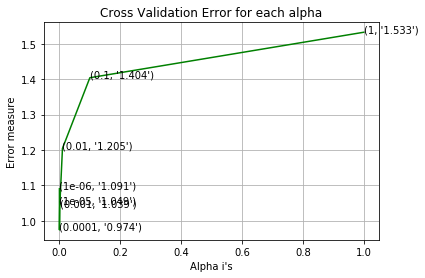

For values of best alpha =  0.0001 The train log loss is: 0.43581511518877664
For values of best alpha =  0.0001 The cross validation log loss is: 0.974345131564849
For values of best alpha =  0.0001 The test log loss is: 0.970575288926258


In [132]:
alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(task1traindata, trainy)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(task1traindata, trainy)
    sig_clf_probs = sig_clf.predict_proba(task1cvdata)
    cv_log_error_array.append(log_loss(cvy, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cvy, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(task1traindata, trainy)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(task1traindata, trainy)

predict_y = sig_clf.predict_proba(task1traindata)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(trainy, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(task1cvdata)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(cvy, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(task1testdata)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(testy, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.2.2. Testing model with best hyper parameters</h4>

Log loss : 0.974345131564849
Number of mis-classified points : 0.35150375939849626
-------------------- Confusion matrix --------------------


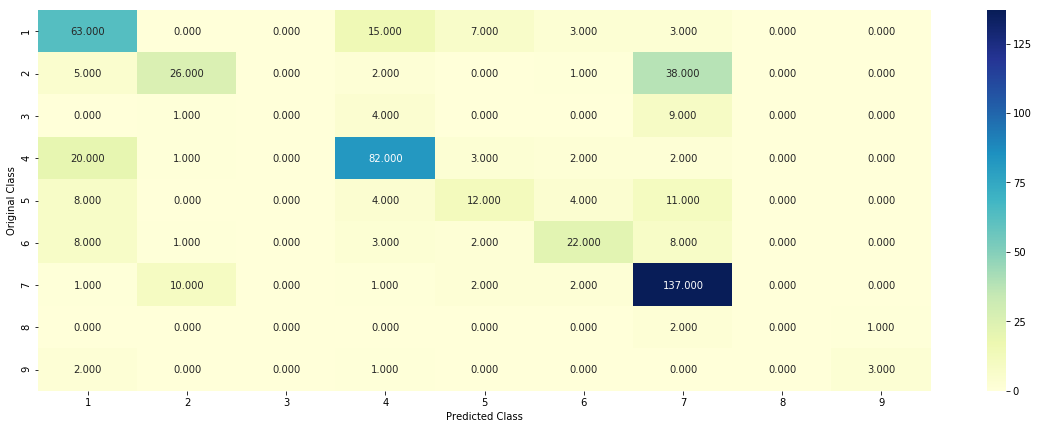

-------------------- Precision matrix (Columm Sum=1) --------------------


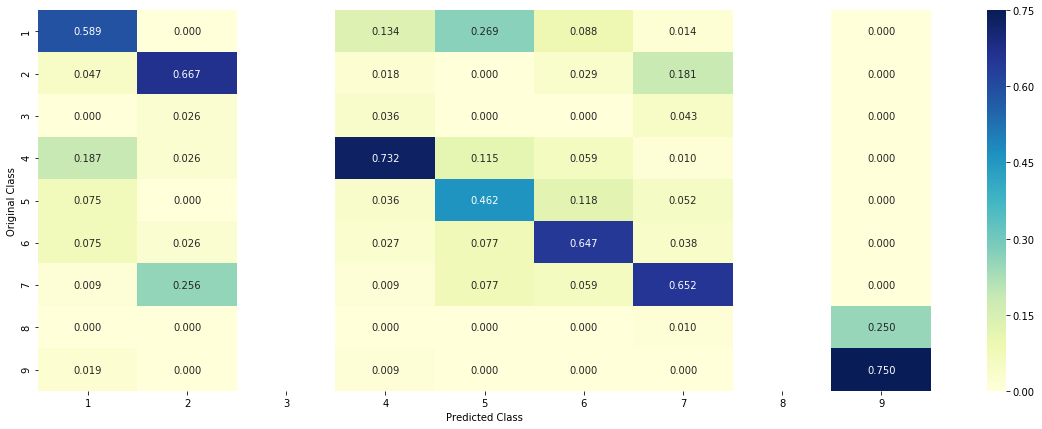

-------------------- Recall matrix (Row sum=1) --------------------


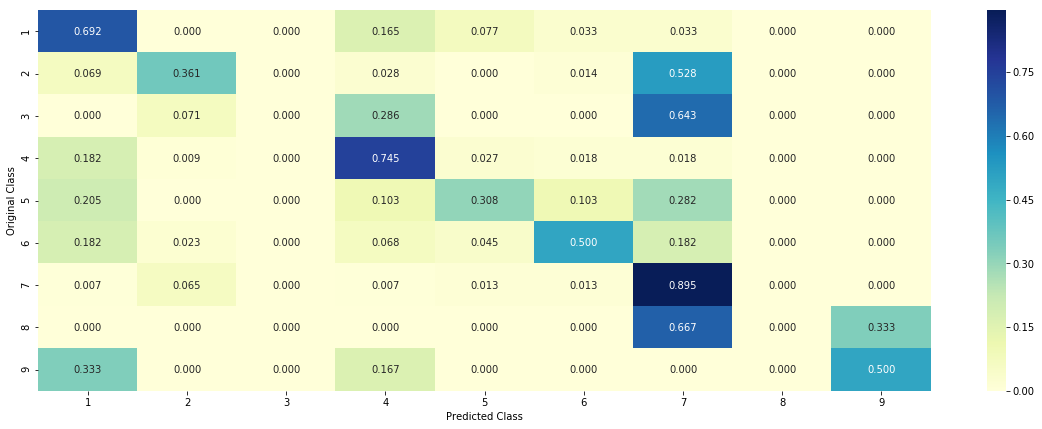

In [133]:


clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(task1traindata, trainy, task1cvdata, cvy, clf)

<h4>4.3.2.3. Feature Importance, Correctly Classified point</h4>

In [134]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(task1traindata,trainy)
test_point_index = 7
no_feature = 500
predicted_cls = sig_clf.predict(task1testdata[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(task1testdata[test_point_index]),4))
print("Actual Class :", testyy[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], testx['Text'].iloc[test_point_index],testx['Gene'].iloc[test_point_index],testx['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.6071 0.0264 0.0039 0.1707 0.0204 0.0306 0.1316 0.0058 0.0034]]
Actual Class : 1
--------------------------------------------------
155 Text feature [surface] present in test data point [True]
160 Text feature [panel] present in test data point [True]
177 Text feature [colorectal] present in test data point [True]
182 Text feature [binding] present in test data point [True]
217 Text feature [one] present in test data point [True]
223 Text feature [function] present in test data point [True]
297 Text feature [deletion] present in test data point [True]
299 Text feature [melanoma] present in test data point [True]
300 Text feature [somatic] present in test data point [True]
308 Text feature [ovarian] present in test data point [True]
315 Text feature [samples] present in test data point [True]
324 Text feature [vitro] present in test data point [True]
330 Text feature [21] present in test data point [True]
338 Text feature [assays] pr

<h4>4.3.2.4. Feature Importance, Inorrectly Classified point</h4>

In [135]:
test_point_index =3
no_feature = 500
predicted_cls = sig_clf.predict(task1traindata[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(task1testdata[test_point_index]),4))
print("Actual Class :", testyy[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], testx['Text'].iloc[test_point_index],testx['Gene'].iloc[test_point_index],testx['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.5432 0.0196 0.0084 0.0811 0.1959 0.0682 0.0739 0.0041 0.0055]]
Actual Class : 1
--------------------------------------------------
72 Text feature [structure] present in test data point [True]
155 Text feature [surface] present in test data point [True]
182 Text feature [binding] present in test data point [True]
217 Text feature [one] present in test data point [True]
223 Text feature [function] present in test data point [True]
297 Text feature [deletion] present in test data point [True]
305 Text feature [ability] present in test data point [True]
315 Text feature [samples] present in test data point [True]
324 Text feature [vitro] present in test data point [True]
338 Text feature [assays] present in test data point [True]
345 Text feature [pcr] present in test data point [True]
349 Text feature [exon] present in test data point [True]
352 Text feature [therefore] present in test data point [True]
362 Text feature [type] presen

In [0]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler(with_mean=False)
task1traindata=scale.fit_transform(task1traindata)
task1cvdata=scale.fit_transform(task1cvdata)
task1testdata=scale.fit_transform(task1testdata)

<h2>4.4. Linear Support Vector Machines</h2>

<h3>4.4.1. Hyper paramter tuning</h3>

for C = 1e-05
Log Loss : 1.4752282702836428
for C = 0.0001
Log Loss : 1.4292921750536136
for C = 0.001
Log Loss : 1.425113618709149
for C = 0.01
Log Loss : 1.411251708625303
for C = 0.1
Log Loss : 1.4053286969847758
for C = 1
Log Loss : 1.3800382061639103
for C = 10
Log Loss : 1.1927219643554956
for C = 100
Log Loss : 1.3405980773325108


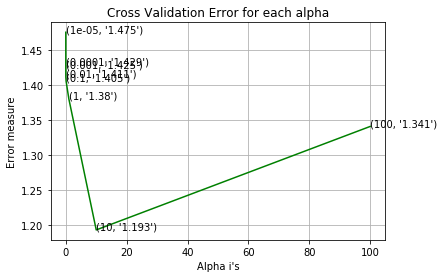

For values of best alpha =  10 The train log loss is: 0.7194825812723985
For values of best alpha =  10 The cross validation log loss is: 1.1927219643554956
For values of best alpha =  10 The test log loss is: 1.197643905726198


In [137]:

alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(task1traindata, trainy)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(task1traindata, trainy)
    sig_clf_probs = sig_clf.predict_proba(task1cvdata)
    cv_log_error_array.append(log_loss(cvy, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cvy, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(task1traindata, trainy)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(task1traindata, trainy)

predict_y = sig_clf.predict_proba(task1traindata)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(trainy, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(task1cvdata)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(cvy, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(task1testdata)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(testy, predict_y, labels=clf.classes_, eps=1e-15))

<h3>4.4.2. Testing model with best hyper parameters</h3>

Log loss : 1.1927219643554956
Number of mis-classified points : 0.37030075187969924
-------------------- Confusion matrix --------------------


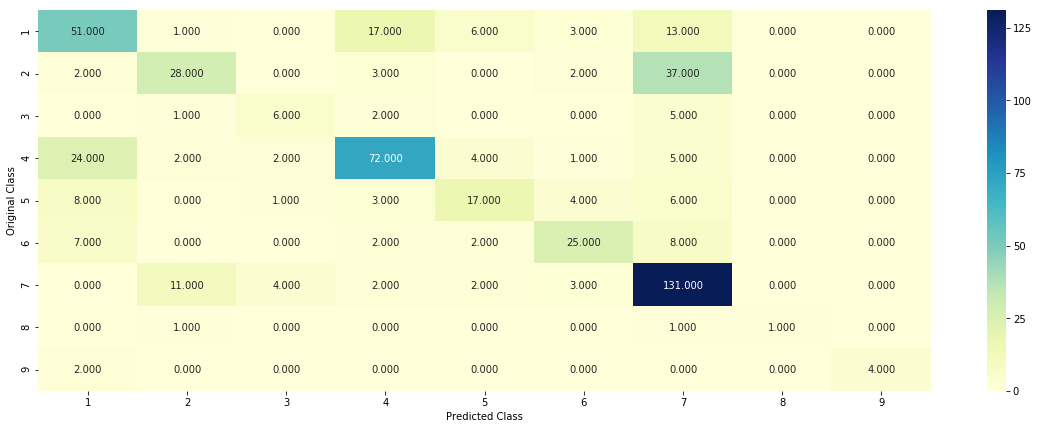

-------------------- Precision matrix (Columm Sum=1) --------------------


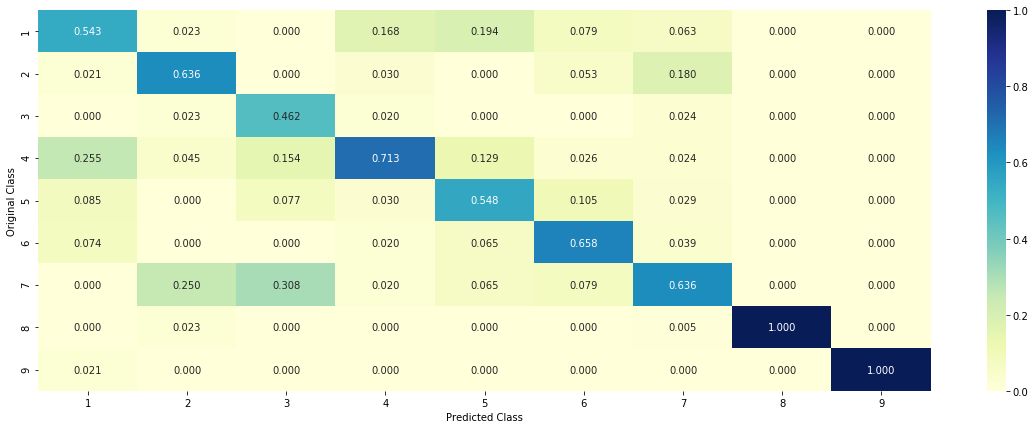

-------------------- Recall matrix (Row sum=1) --------------------


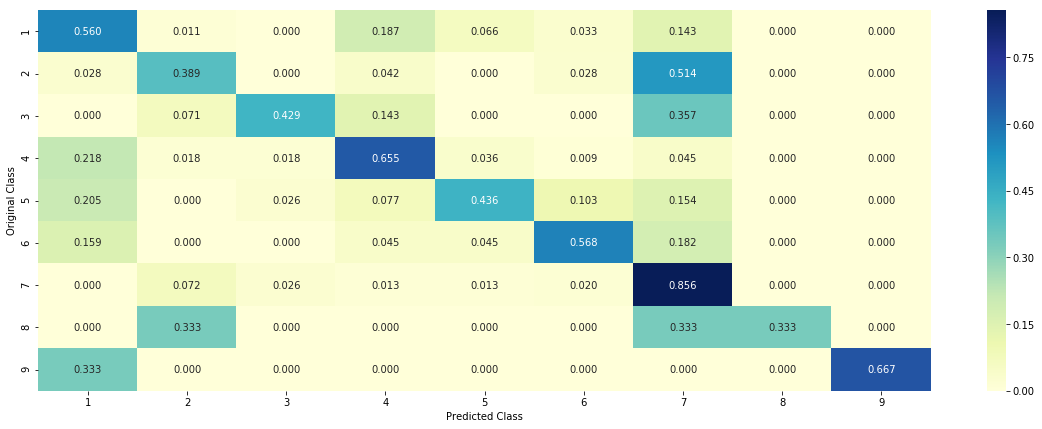

In [138]:

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(task1traindata, trainy,task1cvdata,cvy, clf)

<h3>4.3.3. Feature Importance</h3>

<h4>4.3.3.1. For Correctly classified point</h4>

In [139]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(task1traindata,trainy)
test_point_index = 1
# test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(task1testdata[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(task1testdata[test_point_index]),4))
print("Actual Class :", testyy[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], testx['Text'].iloc[test_point_index],testx['Gene'].iloc[test_point_index],testx['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.1022 0.0669 0.0144 0.5998 0.0429 0.027  0.137  0.0048 0.0051]]
Actual Class : 4
--------------------------------------------------
31 Text feature [suppressor] present in test data point [True]
58 Text feature [riley] present in test data point [True]
62 Text feature [reexpression] present in test data point [True]
64 Text feature [degrade] present in test data point [True]
77 Text feature [sudhl] present in test data point [True]
83 Text feature [pten] present in test data point [True]
89 Text feature [nuclear] present in test data point [True]
109 Text feature [exploited] present in test data point [True]
217 Text feature [nta] present in test data point [True]
224 Text feature [tagged] present in test data point [True]
276 Text feature [mci] present in test data point [True]
300 Text feature [ruvalcaba] present in test data point [True]
307 Text feature [subcellular] present in test data point [True]
312 Text feature [ni] presen

<h4>4.3.3.2. For Incorrectly classified point</h4>

In [140]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(task1testdata[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(task1testdata[test_point_index]),4))
print("Actual Class :", testyy[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], testx['Text'].iloc[test_point_index],testx['Gene'].iloc[test_point_index],testx['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0904 0.1112 0.019  0.0786 0.0503 0.1574 0.4826 0.0054 0.0052]]
Actual Class : 7
--------------------------------------------------
1 Text feature [activation] present in test data point [True]
2 Text feature [activated] present in test data point [True]
3 Text feature [constitutively] present in test data point [True]
4 Text feature [constitutive] present in test data point [True]
5 Text feature [doublet] present in test data point [True]
8 Text feature [overexpression] present in test data point [True]
10 Text feature [3t3] present in test data point [True]
11 Text feature [serum] present in test data point [True]
12 Text feature [technology] present in test data point [True]
16 Text feature [downstream] present in test data point [True]
26 Text feature [transformed] present in test data point [True]
32 Text feature [oncogene] present in test data point [True]
35 Text feature [transforming] present in test data point [True]
36 Tex

<h2>4.5 Random Forest Classifier</h2>

<h3>4.5.1. Hyper paramter tuning (With One hot Encoding)</h3>

for n_estimators = 100 and max depth =  5
Log Loss : 1.1899106542754805
for n_estimators = 100 and max depth =  10
Log Loss : 1.0924262509266893
for n_estimators = 200 and max depth =  5
Log Loss : 1.1729960796804098
for n_estimators = 200 and max depth =  10
Log Loss : 1.0846351033104102
for n_estimators = 500 and max depth =  5
Log Loss : 1.1620366526812291
for n_estimators = 500 and max depth =  10
Log Loss : 1.0803822273865515
for n_estimators = 1000 and max depth =  5
Log Loss : 1.1553754025909344
for n_estimators = 1000 and max depth =  10
Log Loss : 1.0792858173125228
for n_estimators = 2000 and max depth =  5
Log Loss : 1.1525166526621649
for n_estimators = 2000 and max depth =  10
Log Loss : 1.0790652454575842


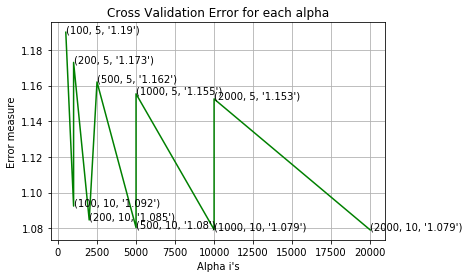

For values of best estimator =  2000 The train log loss is: 0.6210834188557134
For values of best estimator =  2000 The cross validation log loss is: 1.0790652454575844
For values of best estimator =  2000 The test log loss is: 1.0724990575809334


In [141]:

alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(task1traindata, trainy)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(task1traindata, trainy)
        sig_clf_probs = sig_clf.predict_proba(task1cvdata)
        cv_log_error_array.append(log_loss(cvy, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cvy, sig_clf_probs)) 

fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(task1traindata, trainy)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(task1traindata, trainy)

predict_y = sig_clf.predict_proba(task1traindata)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(trainy, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(task1cvdata)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(cvy, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(task1testdata)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(testy, predict_y, labels=clf.classes_, eps=1e-15))

<h3>4.5.2. Testing model with best hyper parameters (One Hot Encoding)</h3>

Log loss : 1.0790652454575844
Number of mis-classified points : 0.37781954887218044
-------------------- Confusion matrix --------------------


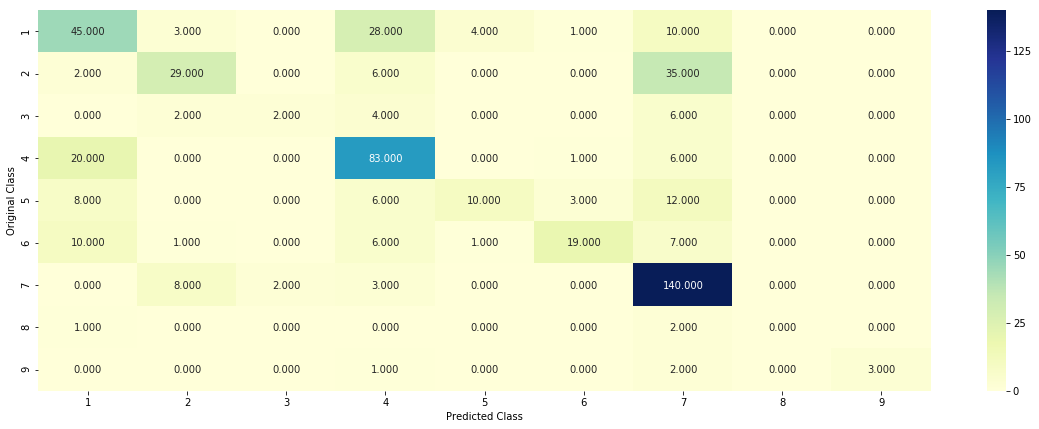

-------------------- Precision matrix (Columm Sum=1) --------------------


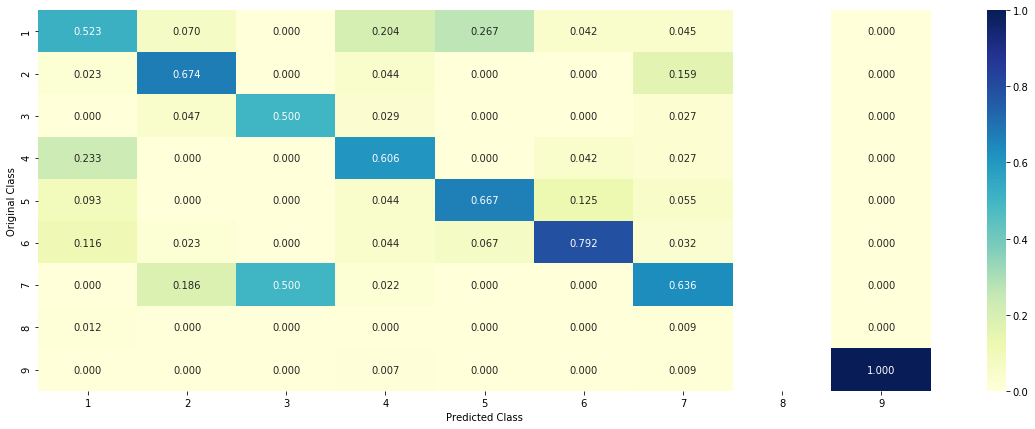

-------------------- Recall matrix (Row sum=1) --------------------


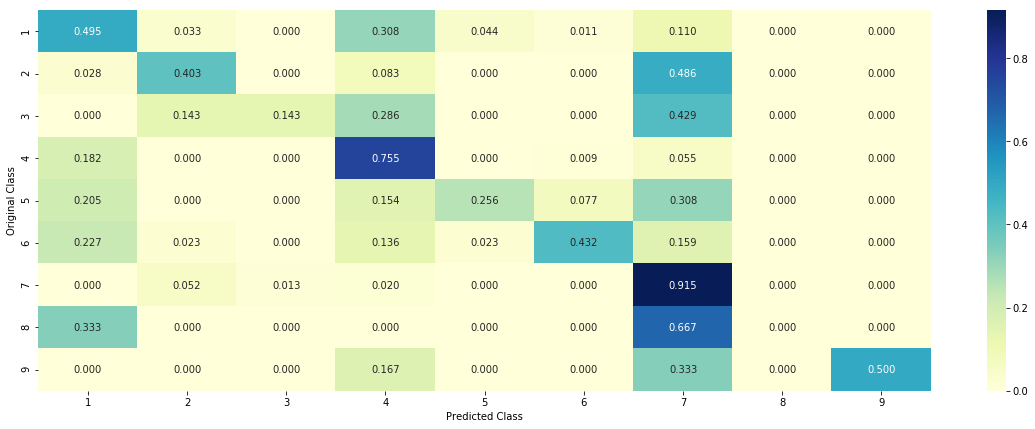

In [142]:

clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(task1traindata,trainy,task1cvdata,cvy, clf)

<h3>4.5.3. Feature Importance</h3>

<h4>4.5.3.1. Correctly Classified point</h4>

In [143]:
test_point_index = 7
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(task1traindata, trainy)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(task1traindata, trainy)

test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(task1testdata[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(task1testdata[test_point_index]),4))
print("Actual Class :", testyy[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], testx['Text'].iloc[test_point_index],testx['Gene'].iloc[test_point_index],testx['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.0753 0.0326 0.0135 0.747  0.0361 0.0255 0.0608 0.0041 0.0052]]
Actual Class : 4
--------------------------------------------------
0 Text feature [kinase] present in test data point [True]
1 Text feature [tyrosine] present in test data point [True]
3 Text feature [function] present in test data point [True]
4 Text feature [activation] present in test data point [True]
5 Text feature [activated] present in test data point [True]
6 Text feature [suppressor] present in test data point [True]
7 Text feature [loss] present in test data point [True]
8 Text feature [inhibitors] present in test data point [True]
9 Text feature [phosphorylation] present in test data point [True]
10 Text feature [constitutive] present in test data point [True]
11 Text feature [missense] present in test data point [True]
13 Text feature [inhibitor] present in test data point [True]
14 Text feature [protein] present in test data point [True]
15 Text feature [o

<h4>4.5.3.2. Inorrectly Classified point</h4>

In [144]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(task1testdata[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(task1testdata[test_point_index]),4))
print("Actuall Class :", testyy[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], testx['Text'].iloc[test_point_index],testx['Gene'].iloc[test_point_index],testx['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.046  0.1244 0.0156 0.0312 0.0378 0.0316 0.7047 0.0044 0.0043]]
Actuall Class : 7
--------------------------------------------------
0 Text feature [kinase] present in test data point [True]
1 Text feature [tyrosine] present in test data point [True]
2 Text feature [activating] present in test data point [True]
3 Text feature [function] present in test data point [True]
4 Text feature [activation] present in test data point [True]
5 Text feature [activated] present in test data point [True]
6 Text feature [suppressor] present in test data point [True]
7 Text feature [loss] present in test data point [True]
8 Text feature [inhibitors] present in test data point [True]
9 Text feature [phosphorylation] present in test data point [True]
10 Text feature [constitutive] present in test data point [True]
11 Text feature [missense] present in test data point [True]
12 Text feature [treatment] present in test data point [True]
13 Text feature

<h2>4.7 Stack the models </h2>

<h3>4.7.1 testing with hyper parameter tuning</h3>

In [153]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(task1traindata, trainy)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(task1traindata, trainy)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(task1traindata, trainy)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(task1traindata, trainy)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cvy, sig_clf1.predict_proba(task1cvdata))))
sig_clf2.fit(task1traindata, trainy)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cvy, sig_clf2.predict_proba(task1cvdata))))
sig_clf3.fit(task1traindata, trainy)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cvy, sig_clf3.predict_proba(task1cvdata))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(task1traindata, trainy)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cvy, sclf.predict_proba(task1cvdata))))
    print('for train data',log_loss(trainy, sclf.predict_proba(task1traindata)))
    print('for test data',log_loss(testy, sclf.predict_proba(task1testdata)))
    log_error =log_loss(cvy, sclf.predict_proba(task1cvdata))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.43
Support vector machines : Log Loss: 1.37
Naive Bayes : Log Loss: 1.26
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.181
for train data 2.179532749608989
for test data 2.1815858353707007
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 2.070
for train data 2.048861294090505
for test data 2.071785128547557
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.667
for train data 1.4918565275647928
for test data 1.6754400812121735
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.247
for train data 0.7310424292621642
for test data 1.2666487588654969
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.209
for train data 0.3860225130381788
for test data 1.2647734774670067
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.320
for train data 0.2947048425105747
for test data 1.4370258533258684


<h3>4.7.2 testing the model with the best hyper parameters</h3>

Log loss (train) on the stacking classifier : 0.7310424292621642
Log loss (CV) on the stacking classifier : 1.2467916185711327
Log loss (test) on the stacking classifier : 1.2666487588654969
Number of missclassified point : 0.40150375939849625
-------------------- Confusion matrix --------------------


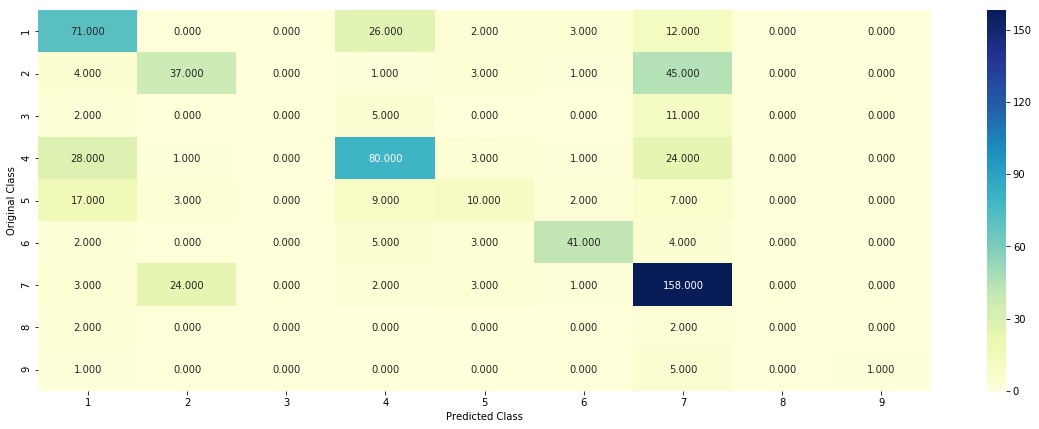

-------------------- Precision matrix (Columm Sum=1) --------------------


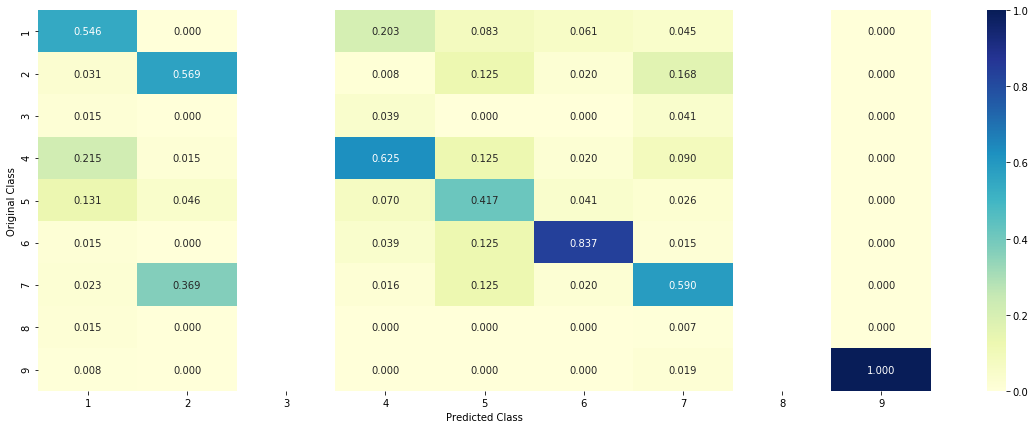

-------------------- Recall matrix (Row sum=1) --------------------


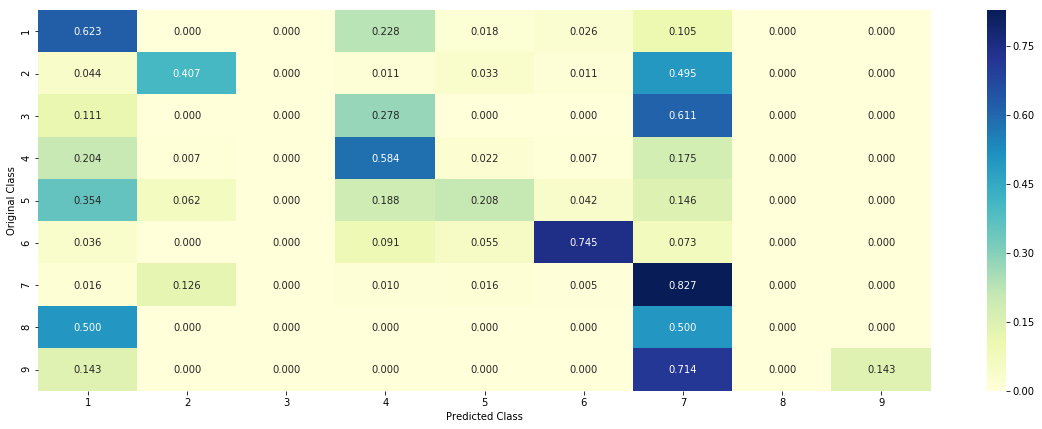

In [147]:

from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(task1traindata, trainy)

log_error = log_loss(trainy, sclf.predict_proba(task1traindata))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cvy, sclf.predict_proba(task1cvdata))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(testy, sclf.predict_proba(task1testdata))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(task1testdata)- testy))/testy.shape[0])
plot_confusion_matrix(test_y=testy, predict_y=sclf.predict(task1testdata))

<h3>4.7.3 Maximum Voting classifier </h3>

Log loss (train) on the VotingClassifier : 0.9059065235215351
Log loss (CV) on the VotingClassifier : 1.3097546696807516
Log loss (test) on the VotingClassifier : 1.3162137625982917
Number of missclassified point : 0.4045112781954887
-------------------- Confusion matrix --------------------


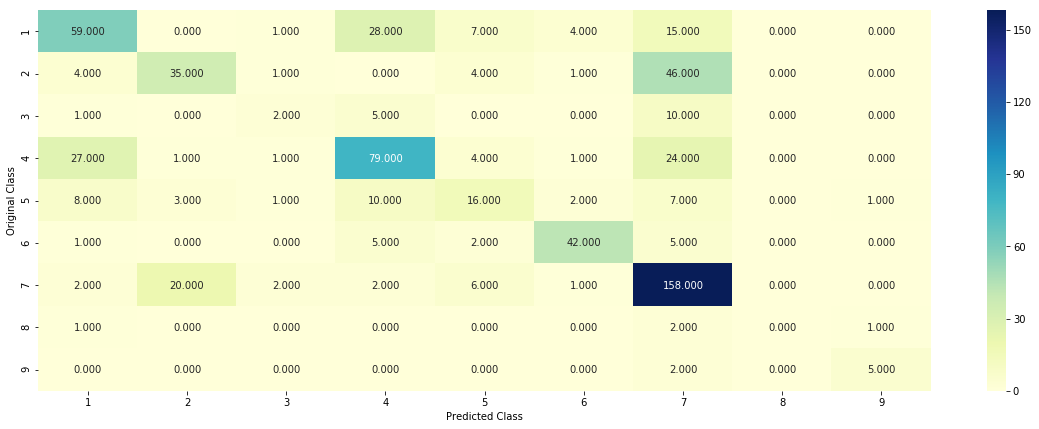

-------------------- Precision matrix (Columm Sum=1) --------------------


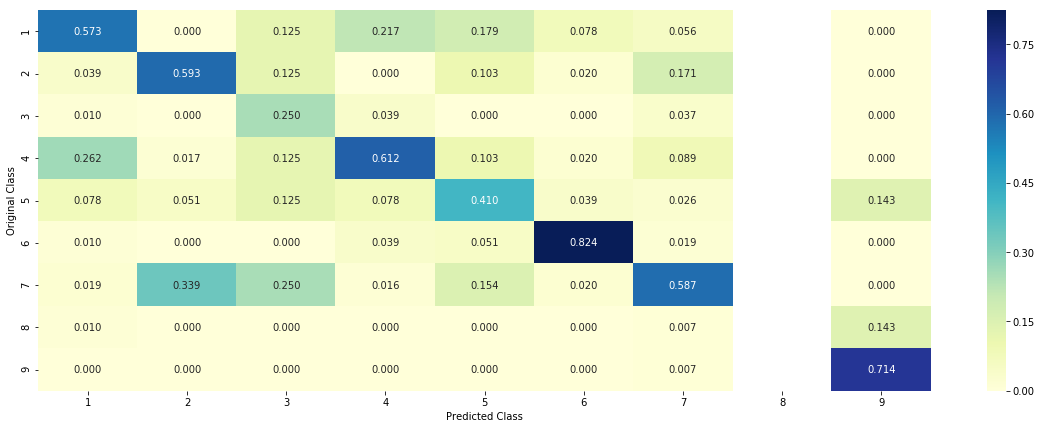

-------------------- Recall matrix (Row sum=1) --------------------


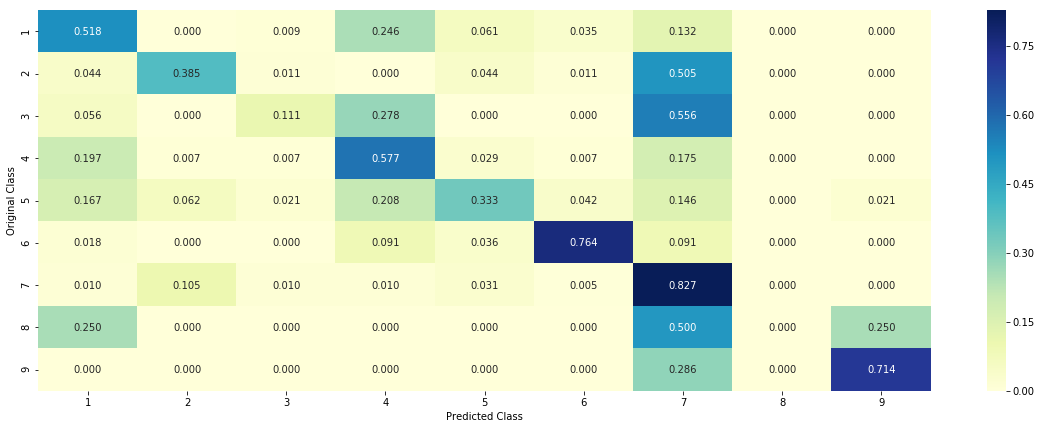

In [148]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(task1traindata, trainy)
print("Log loss (train) on the VotingClassifier :", log_loss(trainy, vclf.predict_proba(task1traindata)))
print("Log loss (CV) on the VotingClassifier :", log_loss(cvy, vclf.predict_proba(task1cvdata)))
print("Log loss (test) on the VotingClassifier :", log_loss(testy, vclf.predict_proba(task1testdata)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(task1testdata)- testy))/testy.shape[0])
plot_confusion_matrix(test_y=testy, predict_y=vclf.predict(task1testdata))

#DOCUMENTATION CONCLUSION AND KEYTAKEAWAYS

In [0]:
import pandas as pd
dta = [['NAIVE BAYES MODEL','ALPHA=0.00001',0.58,1.17,1.12],['KNN MODEL','NUMBER_OF_NEIGHBORS=5',1.26,1.69,1.62],['LOGISTIC REGRESSION','ALPHA=0.0001',0.44,0.97,0.968],['LOGISTIC REGRESSION WITH OUT CLASS BALANCING','ALPHA=0.00001',0.43,0.97,0.97],['LINEAR SVM','ALPHA=10',0.71,1.19,1.19],['RANDOM FOREST CLASSIFIER','NUMBER OF ESTIMATORS=2000',0.62,1.07,1.07],['STACKING CLASSIFIER','ALPHA=0.1',0.73,1.24,1.26],['MAXIMUM VOTING CLASSIFIER','ALPHA=0.1',0.9,1.3,1.31]]
aa=pd.DataFrame(dta, columns=['model','BEST HYPER PARAMETER','TRAIN_LOG_LOSS','CROSS_VALIDATAION_LOGLOSS','TEST_LOG_LOSS'])

In [155]:
aa

,model,BEST HYPER PARAMETER,TRAIN_LOG_LOSS,CROSS_VALIDATAION_LOGLOSS,TEST_LOG_LOSS
0,NAIVE BAYES MODEL,ALPHA=0.00001,0.58,1.17,1.120
1,KNN MODEL,NUMBER_OF_NEIGHBORS=5,1.26,1.69,1.620
2,LOGISTIC REGRESSION,ALPHA=0.0001,0.44,0.97,0.968
3,LOGISTIC REGRESSION WITH OUT CLASS BALANCING,ALPHA=0.00001,0.43,0.97,0.970
4,LINEAR SVM,ALPHA=10,0.71,1.19,1.190
5,RANDOM FOREST CLASSIFIER,NUMBER OF ESTIMATORS=2000,0.62,1.07,1.070
6,STACKING CLASSIFIER,ALPHA=0.1,0.73,1.24,1.260
7,MAXIMUM VOTING CLASSIFIER,ALPHA=0.1,0.90,1.30,1.310


#### IN PERSONAL CANCER DIAGNOSIS WE ARE GIVEN WITH THE GENE FEATURE,VARIATION FEATURE AND TEXT FEATURE .WE HAVE TO PREDICT THE THE CANCER BELONGS TO WHICH CLASS. SINCE IT IS RELATED TO MEDICAL THE PREDICTION OF CLASS LABEL IS MORE IMPORTANT AND THE INTERPRETABILITY IS MORE IMPORTANT. SO WE HAVE PRINTED THE FEATURES BASED ON WHICH FEATURES THE CLASS LABEL IS PREDICTED. SINCE IT IS MULTICLASS CLASSIFIFCATION WE TAKE THE MULTICLASS LOGLOSS AS OUR METRIC. WE CAN ALSO SEE THE PROBABILTIY VALUE OF EACH CLASSLABEL SO THAT WE CAN SET UP THE THRESHOLD AND PREDICT THE CLASS LABEL. 

* WE HAVE TAKEN THE EACH FEATURE VARIATION,GENE,TEXT OF THE FEATURES AND PERFORMED THE EXPLORATORY DATA ANALYSIS OVER THE FEATURES .IT IS IMPORTANT TO PERFORM THE 
* DATA PREPROCESSING 
* EXPLORATORY DATA ANALYSIS BEFORE WE PERFORM THE FEATURE EXTRACTION AND FEATURE ENGINEERING AND DEPLOY INTO THE MODELS.
* WE PERFORM THE PREPROCESSING OVER THE TEXT DATA WE REMOVE THE UNWANTED TEXTS AND REGULAR EXPRESSIONS AND PUNCTUATIONS.


#### WE HAVE SPLITTED THE DATA BEFORE WE ENCODE THE FEATURES INORDER TO PREVENT THE DATA LEAKAGE. BECAUSE THE KEYTAKE AWAYS OF THE EXPLORATORY DATA ANALYSIS IS WHETHER THE CLASS LABELS ARE BALANCED OR NOT. WE SPLIT THE DATA INTO TRAIN TEST AND CROSS VALIDATION BASED ON THE STRATEGY OF THE Y CLASS LAEBL. INORDER TO MAINTAIN BALANCE IN THE ALL TRAIN ,TEST AND CROSS VALIDATION DATA.

##ONE OF THE MOST IMPORTANT KETYTAKE AWAY IS THE VALUE OF LOG LOSS WE DONT HAVE THE MAXIMUM VLAUE OR THRESHOLD VALUE FOR THE LOG LOSS BASED ON WHICH WE CAN SAY WHETHER  THE MODEL IS PERFORMING GOOD OR BAD. SO WE ALWAYS DESIGN A RANDOM MODEL INORDER TO SET THE THRESHOLD VALUE FOR THE LOG LOSS. IF THE LOG LOSS OBTAINED IS GRATER THAN THE RANDOM MODEL THEN THE MODEL WHICH WE ARE USING IS VERY BAD PERFORMER. 

## WE ALSO PLOT THE CONFUSION MATRIX BECAUSE WE CAN CHECK HOW THE FEATURE LABELS ARE GETTING PREDICTED.WE WILL PERFORM THE UNIVARIATE ANALYSIS FOR THE EACH FEATURE AND CHECK HOW THE MODELS ARE PERFORMIN FOR THE EACH FEATURE FROM THIS MEASURING THE LOGLOSS OF THE MODEL BASED ON THE EACH FEATURE WE CAN UNDERSTAN WHICH FEATURE IS PERFORMING BETTER IN THE MODEL.
* WE PERFORMED THE UNIVARAITE ANALYSIS OVER THE ALL FEATURES GENE VARATION AND TEXT DATA.
* AS A PART OF THIS CASE STUDY WE HAVE USED ONEHOT ENCODING,TFIDF ENCODING AND THE RESPONSE CODING.
* WE HAVE CHECKED THEPERFORMANCE BASED ON THE TYPE OF ENCODING WE USED AND THE MODEL WE DEPLOYED.

###AS A PART OF ASSIGNMENT WE USED THE ONEHOT ENCODING INSTEAD OF TFIDF CODING AND NOTED THE PERFORMANCE OF THE FEATURES  AND THE MODELS UISNG ONE HOT ENCODING. THE IMPORTANT TASK WE HAVER PERFORMED IN THE ASSIGNMENT IS THE USAGE OF THE STACKING CLASSIFIER AND THE MAXIMUM VOTING CLASSIFIER.WE  BULD STACKING CLASSIFIER IH N WHICH WE STACK THE MODELS AND ABTAIN THE LOG LOSS OF TRAIN ,TEST AND CROSS VLAIDATION.